# Sales Prediction 


#### For all documents files datasets, and history of project visit : https://github.com/MichalI495002/Personal-Challenge.git

Data set contain sales of various (~1000) protective gear products from 2019 to mid-September of 2023

Our challenge is to match the most important external factors (e.g. Economic Factors (e.g. Inflation)) to see and use relation between external factors and sales for future prediction, thanks to connecting external factors with our data we can see influence of external variables on our sales and predict future behavior.

Our task it to create model which is going to be able to predict future sales based on inputted data and selected features  

*Due to anonymization of data let's name our company "XYZ" for easier descriptions*

### Versioning
Versions of the required libraries.


In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import prophet
import matplotlib
import io, math, platform
from matplotlib import pyplot as plt
import pickle
print("scikit-learn version:", sklearn.__version__)    # 1.3.2
print("pandas version:", pd.__version__)           # 2.1.2
print("seaborn version:", sns.__version__)     # 0.13.0
print("numpy version:", np.__version__)    # 1.26.1     
print("prophet version:", prophet.__version__)    # 1.1.5 
print("matplotlib version:", matplotlib.__version__)    # 3.8.1
print("math, io, platform versions are bind with Python version:", platform.python_version())   # 3.10.12          

Importing plotly failed. Interactive plots will not work.


scikit-learn version: 1.3.0
pandas version: 1.5.1
seaborn version: 0.12.1
numpy version: 1.24.0
prophet version: 1.1.5
matplotlib version: 3.7.2
math, io, platform versions are bind with Python version: 3.10.12


# Read data 

Here we are going to read sales data from file for analyzation

In [2]:
# Read the CSV file
data = pd.read_csv('../Datasets/Sales Data/Sales Data 2019-2023.csv')

# Display the first few rows of the data
print(data.head())

      Index                                               Name  \
0   ZB5K005                    MAINZ safety glasses, clear uni   
1   ZB5K003             ALB protective goggles transparent uni   
2   ZB5K186                        ALF baseball cap, black uni   
3   ZB5K152   DALKE half mask with FFP2 valve light gray un...   
4   ZB5K007                    MAINZ tinted uni safety glasses   

  Z_Classification                Subgroup_2             Subgroup_3  \
0                A   EYE AND FACE PROTECTION                GLASSES   
1                B   EYE AND FACE PROTECTION                GLASSES   
2                B           BODY PROTECTION   CLOTHING ACCESSORIES   
3                B    RESPIRATORY PROTECTION             HALF MASKS   
4                B   EYE AND FACE PROTECTION                GLASSES   

                  Subgroup_4  2019-01  2019-02  2019-03  2019-04  ...  \
0   MAINZ PROTECTIVE GLASSES        0        0        0        0  ...   
1         ALB SAFETY GOGGLES  

Put data in data frame

In [3]:
df = pd.DataFrame(data)
df

,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount
0,ZB5K005,"MAINZ safety glasses, clear uni",A,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,1764,931,2813,2404,2978,10925,632,340,75,48532
1,ZB5K003,ALB protective goggles transparent uni,B,EYE AND FACE PROTECTION,GLASSES,ALB SAFETY GOGGLES,122,140,810,274,...,250,566,744,504,641,1393,572,672,75,30408
2,ZB5K186,"ALF baseball cap, black uni",B,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,149,303,927,1298,2143,1047,1112,549,92,29872
3,ZB5K152,DALKE half mask with FFP2 valve light gray un...,B,RESPIRATORY PROTECTION,HALF MASKS,NaN,315,350,879,287,...,27,177,421,61,477,608,591,254,164,28601
4,ZB5K007,MAINZ tinted uni safety glasses,B,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,70,172,1542,757,1396,6058,572,291,63,22620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,ZB5K355-1-3XL,EMS protective trousers jeans blue 3XL (58),A,BODY PROTECTION,PROTECTIVE CLOTHING,PROTECTIVE TROUSERS,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
1027,ZB5K474-M,ELZ yellow winter hat uni MARKETY,NaN,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1028,ZB5K516-48,ZORGE safety shoes S3 SRC black 48,N,LEG PROTECTION,SAFE SHOES,SHOES,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1029,ZB5K516-47,ZORGE safety shoes S3 SRC black 47,N,LEG PROTECTION,SAFE SHOES,SHOES,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Checking for missing values 

In [4]:
# Check for missing values in the 'Name' column
missing_names = df['Name'].isnull().sum()
print(f"Missing names count: {missing_names}")

# Drop rows where 'Name' is missing
df = df.dropna(subset=['Name'])

Missing names count: 1


We create another data frame without last row to create histogram

We delete last row because it continues sums of columns and it if we would leave it histogram would show different not reliable data 

The given code snippet below utilizes pandas and matplotlib libraries for data visualization in Python.

1. A subset of the dataframe `df` is created by excluding the last row, resulting in `df2`.
2. A histogram is generated for the column "total amount" of `df2` using the `.hist` method.
3. The histogram consists of 200 bins and is displayed with a figure size of 25x10 inches.
4. The `density` parameter is set to `True`, indicating that the histogram will represent the probability density function.

This visualization helps in understanding the distribution of values in the "total amount" column of the dataframe.


array([[<Axes: title={'center': 'total amount'}>]], dtype=object)

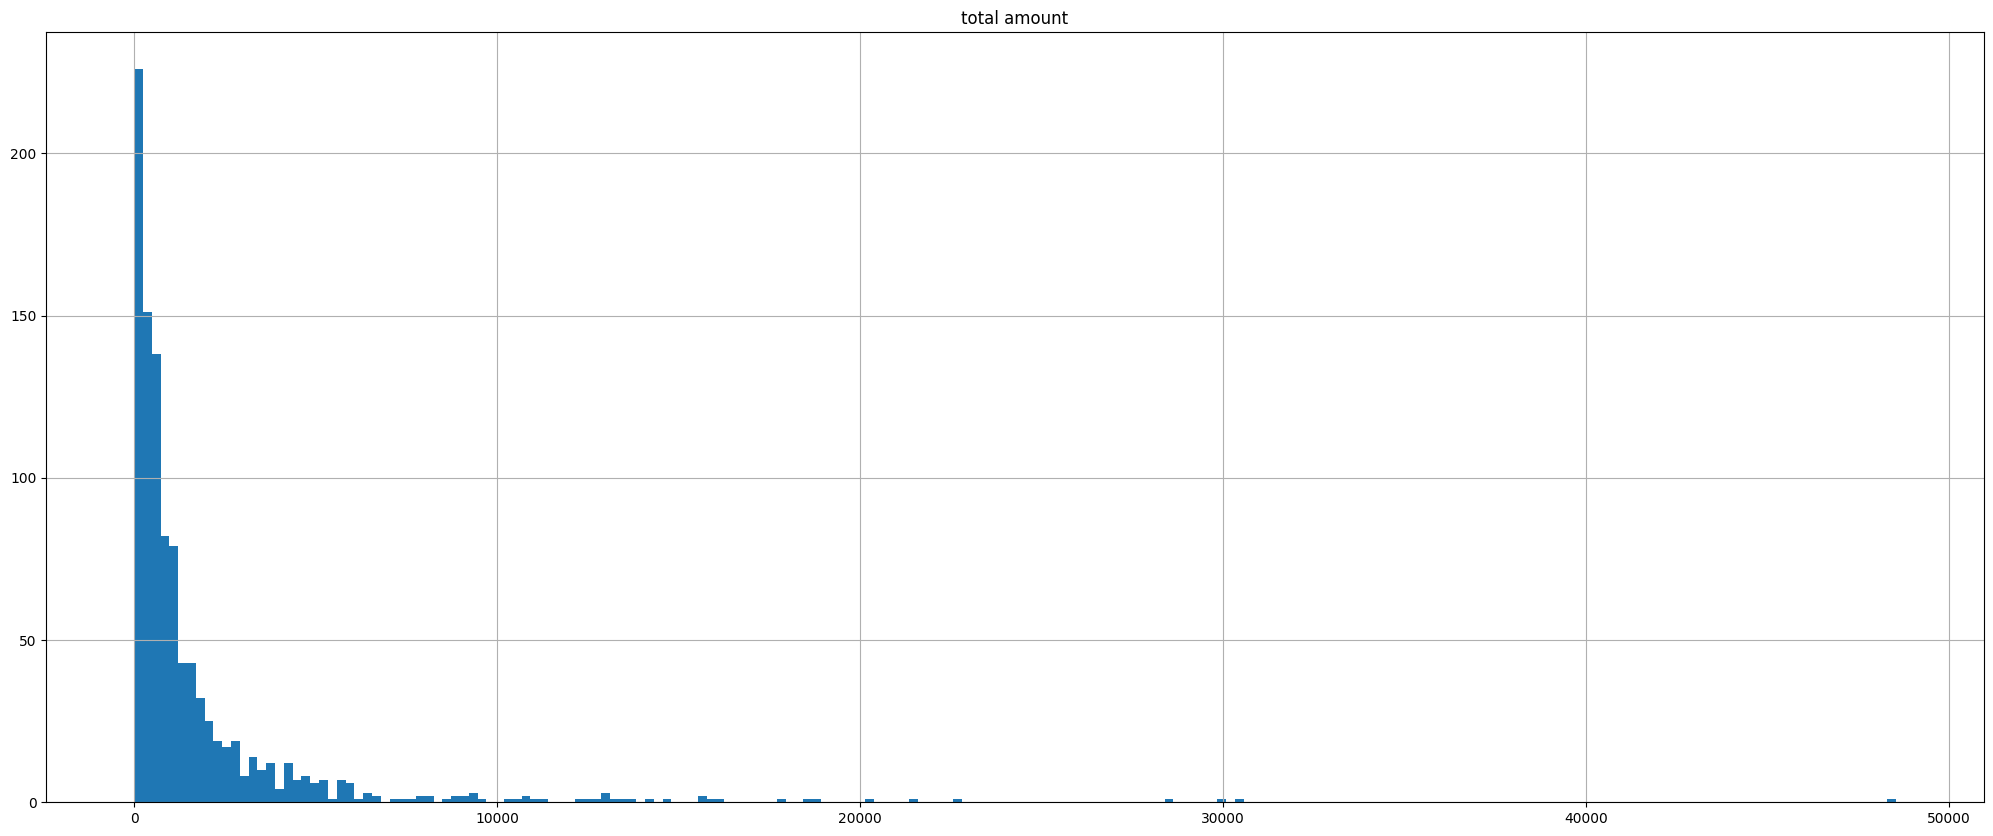

In [5]:
df2 = df.head(df.shape[0] - 1)
df2.hist(column="total amount", bins=200, figsize=(25,10),density=0)

# We used "bins=200" becouse of big amount of products, we need more detailed histogram to show correct trend

### Histogram Analysis

- **Distribution Shape:** The histogram shows a right-skewed (or positively skewed) distribution. This suggests that a majority of the products have a relatively low total sales amount, with fewer products having very high sales figures.

- **Common Sales Range:** The bulk of the data points (i.e., the products) are concentrated in the lower end of the total amount axis. This indicates that most products have a modest amount of sales.

- **High Sales Outliers:** The long tail on the right side of the histogram suggests the presence of a few products with exceptionally high total sales amounts compared to the rest. These could be considered outliers or best-sellers.

- **Sales Distribution:** The distribution is not uniform, indicating variability in the popularity or demand of different products. Some products are significantly more popular, leading to higher sales, while many others are less popular.

- **Potential for Focused Marketing or Inventory Management:** The businesses could potentially focus marketing efforts or inventory management on the high-selling products (those in the long tail) as these are likely driving a significant portion of the revenue.

- **Data-Driven Decision Making:** This kind of distribution is typical in sales data, reflecting the Pareto principle (or 80/20 rule) where a small percentage of products might be contributing to a large percentage of sales.

Let's now generate plot to see trend in sales

The provided code snippet performs data manipulation and visualization using pandas' capabilities.

1. It extracts the monthly columns from the dataframe `df`, excluding the last column which is assumed to be "total amount".
2. It computes the sum of sales for each month across all data in `df`.
3. A line plot is created to visualize the `monthly_sales` data with a figure size of 15x7 inches.
4. The plot is titled "Monthly Sales from 2019 to 2023" and includes grid lines for better readability.
5. The y-axis is labeled "Total Sales" and the x-axis is labeled "Month".
6. The x-axis tick labels are rotated 45 degrees for clarity.

This visualization aids in the analysis of sales trends over the months from 2019 to 2023.


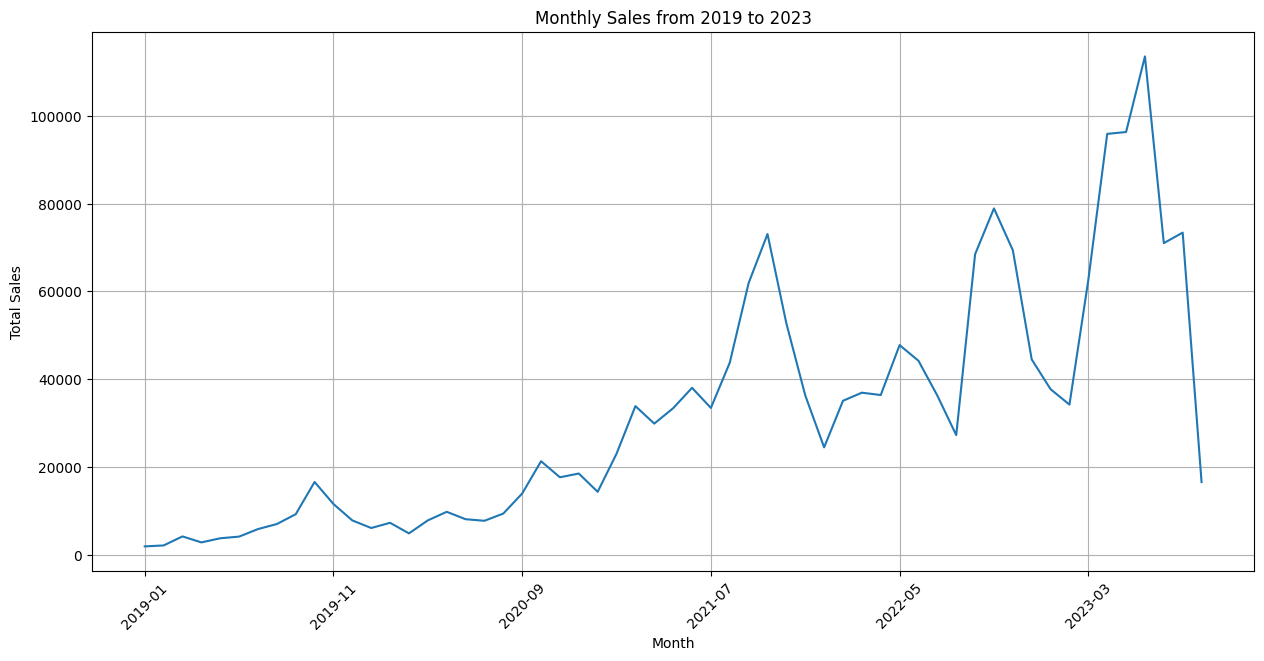

In [6]:
# Extract monthly columns
monthly_columns = df.columns[6:-1]  # Exclude the "total amount" column

# Sum the sales for each month
monthly_sales = df[monthly_columns].sum()

ax = monthly_sales.plot(figsize=(15, 7), grid=True, title="Monthly Sales from 2019 to 2023", ylabel="Total Sales")
ax.set_xlabel("Month")
ax.tick_params(axis='x', rotation=45)

### Sales Trend Analysis (Jan 2019 - Sep 2023)

1. **Seasonal Patterns:**
   Clear seasonal trends are evident, with peaks and troughs in sales occurring regularly each year.

2. **Year-to-Year Changes:**
   Noticeable variations in sales between different years, suggesting shifts in market conditions, consumer behavior, or business strategies.

3. **Anomalous Fluctuations:**
   Unusual spikes or drops in sales at certain points, potentially due to special events, marketing campaigns, or external factors.

4. **Overall Trend:**
   A general trend (upward or downward) is observable over the entire timeframe, important for long-term strategic planning.

5. **Month-to-Month Variability:**
    Sales fluctuate from month to month, influenced by marketing activities, stock levels, and consumer demand.

Here we can see trend of sales, the last month (September 2023) has unexpectedly low sales because data comes from beginning of September

## In depth analysis


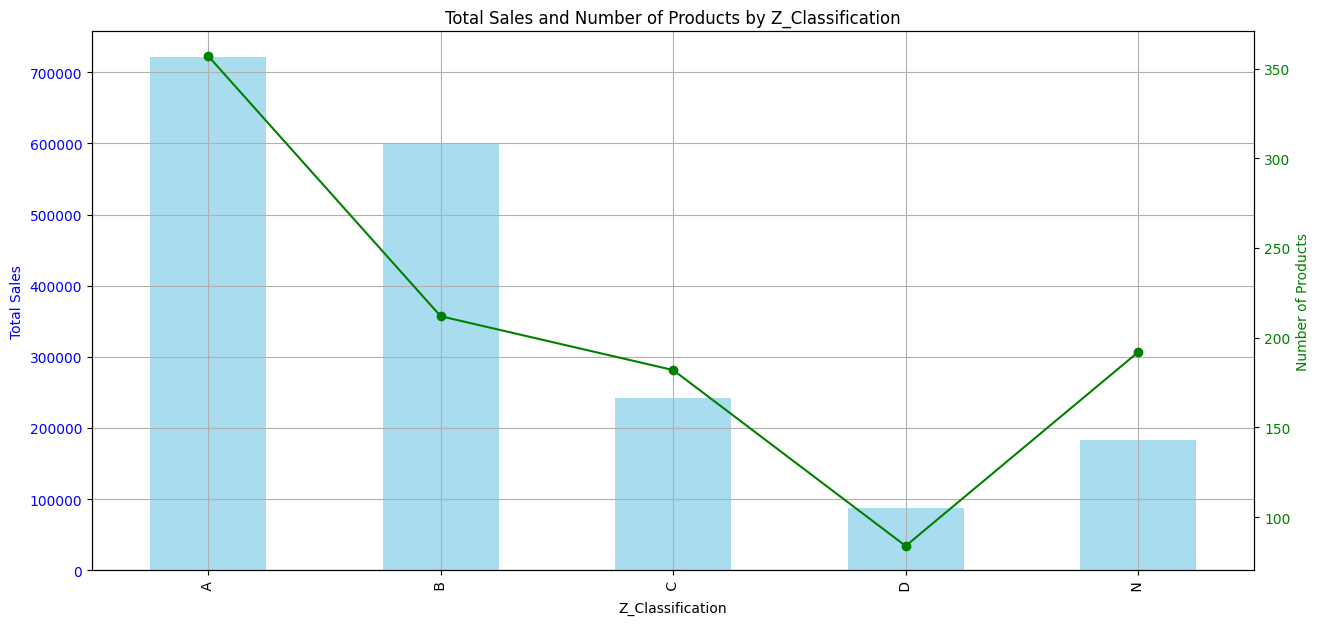

In [7]:
# Grouping data by Z_Classification and calculating total sales for each classification
classification_sales = df.groupby('Z_Classification')['total amount'].sum()

# Getting the count of products in each classification
classification_count = df['Z_Classification'].value_counts()

# Creating a DataFrame for plotting
classification_analysis = pd.DataFrame({
    'Total Sales': classification_sales,
    'Number of Products': classification_count
})

# Code for plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar plot for total sales
classification_analysis['Total Sales'].plot(kind='bar', color='skyblue', alpha=0.7, ax=ax1)
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Creating a second y-axis for the number of products
ax2 = ax1.twinx()
classification_analysis['Number of Products'].plot(kind='line', marker='o', color='green', ax=ax2)
ax2.set_ylabel('Number of Products', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Setting common attributes
ax1.set_xlabel('Z_Classification')

ax1.set_title('Total Sales and Number of Products by Z_Classification')
ax1.grid(True)

- **Higher Sales in Higher Classifications**:
    The classifications A and B, which represent higher-performing products, dominate both in terms of total sales and the number of products. This indicates that products categorized as higher quality or more popular are indeed generating more sales.

- **Lower Classifications**:
    Classifications C and D, despite having fewer products, contribute significantly to the total sales, though much less compared to A and B. This might indicate a niche or loyal customer base for these products.

- **New Products (N)**:
    New products have made a substantial impact in terms of sales, considering their recent introduction to the market. This suggests a good reception of new entries in the market or a continuous demand for innovative products in this sector.

Overall, the data shows a strong correlation between the classification of products and their sales performance. High classification correlates with high sales, reinforcing the effectiveness of this categorization strategy in understanding market dynamics.

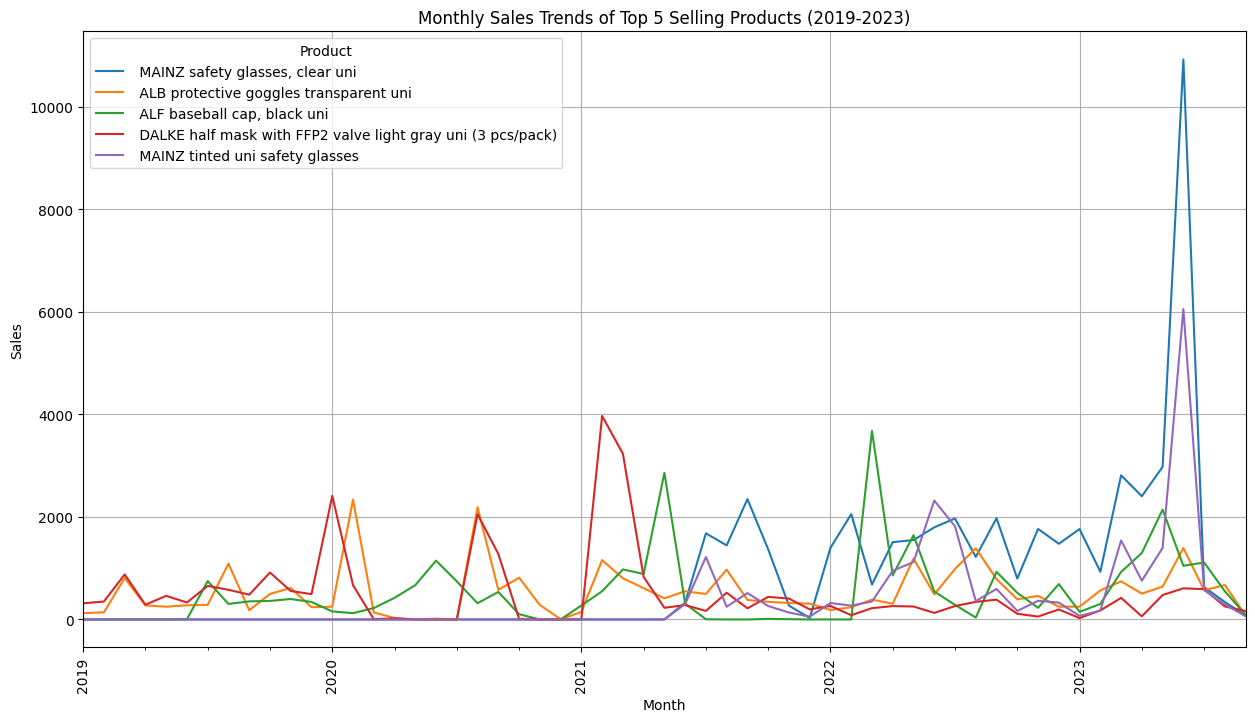

In [8]:
# Identifying the top 5 selling products based on 'total amount'
top_selling_products = df.nlargest(5, 'total amount')['Name']

# Extracting the sales data for these top 5 products
top_selling_data = df[df['Name'].isin(top_selling_products)]

# Selecting only the monthly sales columns for these products
top_selling_monthly_sales = top_selling_data.set_index('Name')[monthly_columns]

# Transposing the dataframe for easier plotting
top_selling_monthly_sales_transposed = top_selling_monthly_sales.T

# Convert the index to a datetime format for plotting
top_selling_monthly_sales_transposed.index = pd.to_datetime(top_selling_monthly_sales_transposed.index, format='%Y-%m')

# Plotting the sales trends of the top 5 selling products
fig, ax = plt.subplots(figsize=(15, 8))
top_selling_monthly_sales_transposed.plot(ax=ax)
ax.set_title('Monthly Sales Trends of Top 5 Selling Products (2019-2023)')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.legend(title='Product', labels=top_selling_products)
ax.grid(True)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.show()

Based on the sales data for the top 5 selling products in the protection gear market in Poland from 2019 to 2023, we can draw several conclusions:

- **Dominant Product**: One product significantly outsells the others, suggesting a competitive advantage due to quality, brand reputation, or necessity.

- **Sales Peaks**: There are distinct peaks in sales, which may be attributed to seasonal demands, marketing efforts, or changes in safety regulations.

- **Market Trends**: The fluctuating sales volumes indicate evolving market trends or shifts in consumer preferences, useful for strategic business planning.

- **Product Lifecycles**: Sales trends may reflect the life cycles of products, underscoring the importance of innovation and product development in maintaining market presence.

- **Market Resilience**: The consistent demand for safety gear suggests a resilient market, likely driven by heightened awareness and regulatory standards for workplace and public safety.

Further investigation and additional context would be necessary to fully understand the implications of these insights for business strategy.


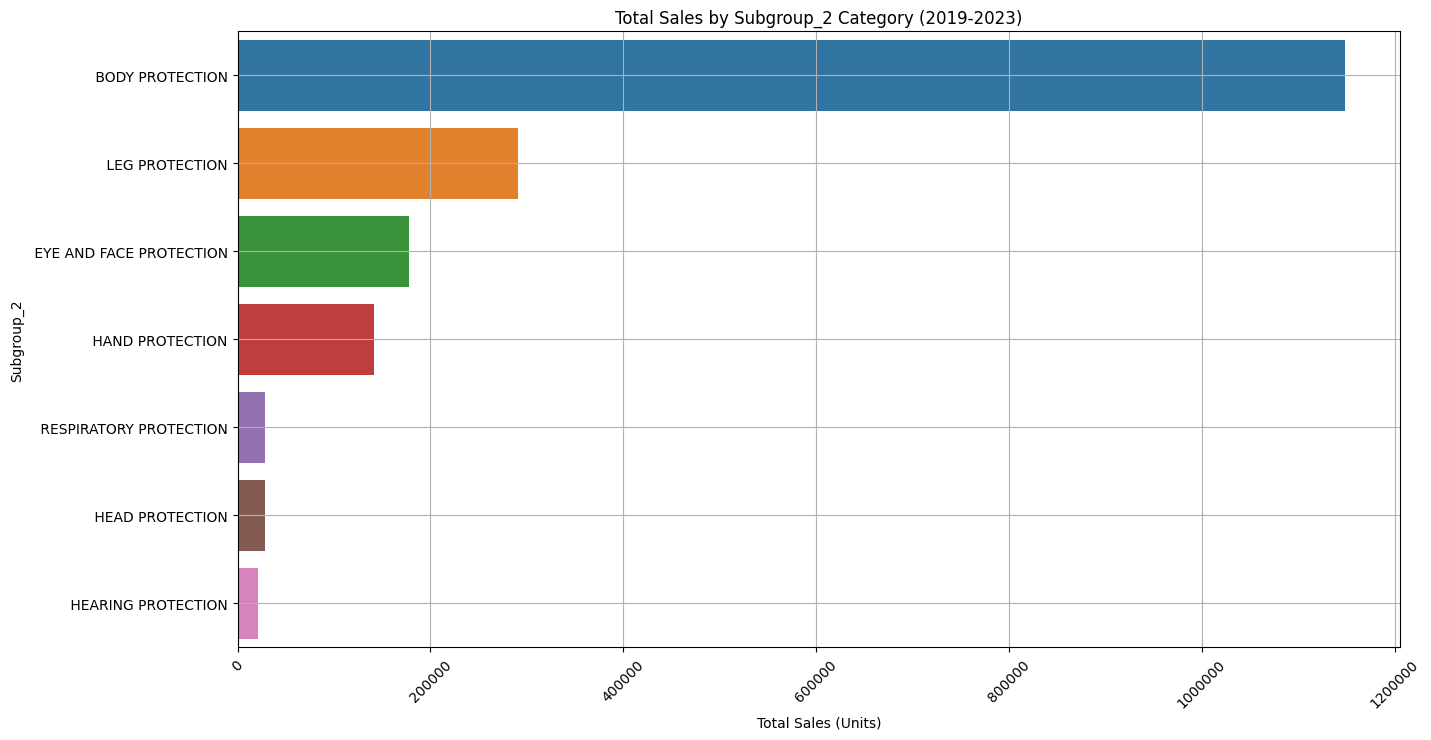

In [9]:
# Extracting the list of all monthly sales columns
monthly_columns = df.columns[df.columns.str.contains('2019|2020|2021|2022|2023')]

# Grouping the data by Subgroup_2 for analysis
subgroup_2_sales = df.groupby('Subgroup_2')[monthly_columns].sum()

# Summing up all monthly sales for each Subgroup_2
subgroup_2_total_sales = subgroup_2_sales.sum(axis=1).reset_index(name='Total Sales')

# Sorting the data for better visualization
subgroup_2_total_sales_sorted = subgroup_2_total_sales.sort_values(by='Total Sales', ascending=False)

# Plotting the sales for each Subgroup_2 with clearer x-axis labels
plt.figure(figsize=(15, 8))
sns.barplot(data=subgroup_2_total_sales_sorted, x='Total Sales', y='Subgroup_2')
plt.title('Total Sales by Subgroup_2 Category (2019-2023)')
plt.xlabel('Total Sales (Units)')
plt.ylabel('Subgroup_2')
plt.grid(True)

# Adjusting x-axis to show actual sales numbers instead of scaled values
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='x')  # Change the x-axis label format to plain

plt.show()


Based on the analysis of the sales data by `Subgroup_2` category from 2019 to 2023, we can draw the following conclusions:

- **Dominance of Certain Categories**:
The "Body Protection" category significantly dominates in terms of sales, overshadowing all other categories. This suggests a high market demand for body protection products, potentially due to industry requirements, safety regulations, or consumer preferences.

- **Varied Demand across Categories**:
There is a varied level of demand across different subgroups. While categories like "Leg Protection" and "Eye and Face Protection" show substantial sales, others like "Hearing Protection" and "Head Protection" have considerably lower sales. This indicates different levels of market saturation or consumer demand in each category.

- **Potential Growth Areas**:
Categories with lower sales, such as "Hearing Protection" and "Head Protection", might represent areas for growth. Strategies to boost sales in these categories could be beneficial, including marketing, product development, or exploring untapped market segments.

- **Market Trends and Consumer Behavior**:
The sales patterns could reflect underlying market trends and consumer behavior. High sales in "Body Protection" might indicate growing safety awareness, while lower sales in other categories could signal a lack of awareness or lesser perceived importance.

- **Strategic Focus for Business**:
For businesses in these product areas, focusing on high-demand categories while exploring strategies to increase market share in lower-performing categories could be a balanced approach. This might include diversification of product offerings, targeted marketing campaigns, or new product innovations.

In summary, the analysis underscores the importance of understanding market dynamics and consumer preferences across different product categories for informed business decisions and strategic planning.


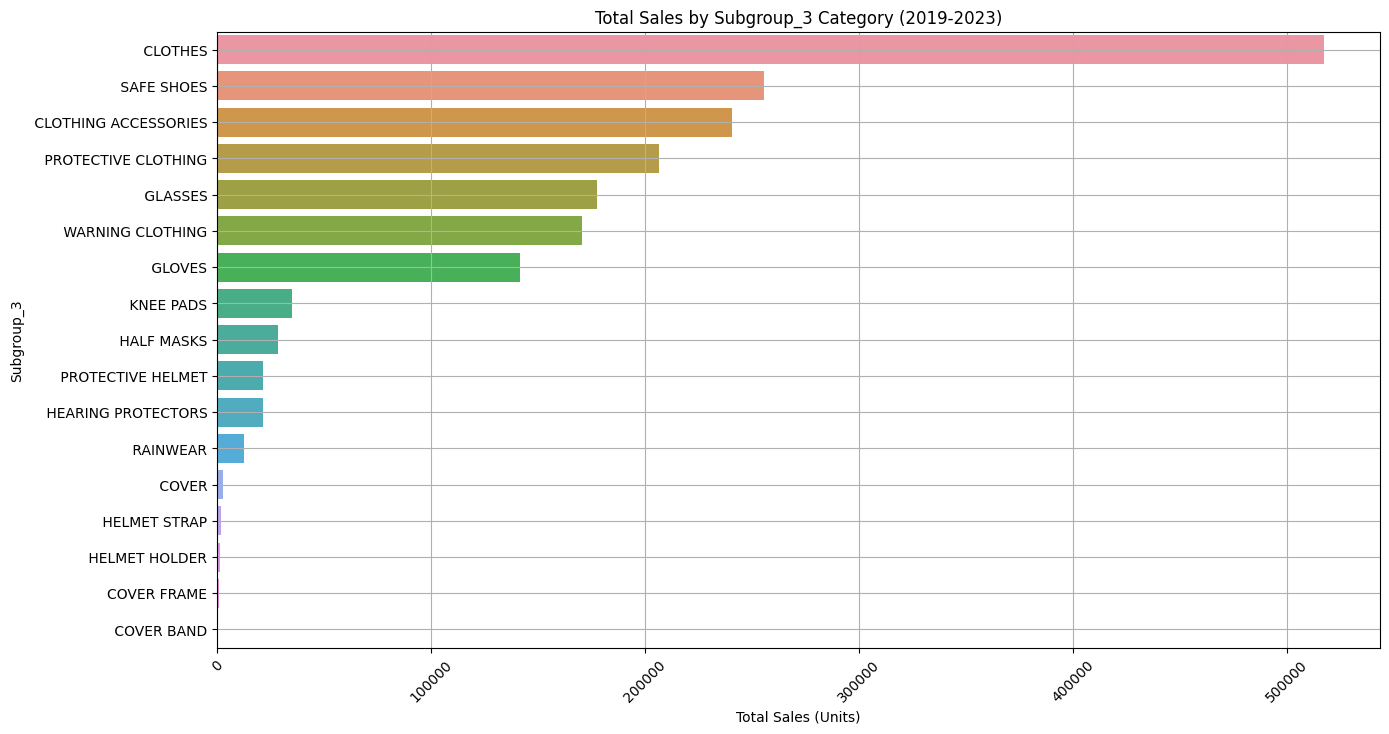

In [10]:
# Grouping the data by Subgroup_3 for analysis
subgroup_3_sales = df.groupby('Subgroup_3')[monthly_columns].sum()

# Summing up all monthly sales for each Subgroup_3
subgroup_3_total_sales = subgroup_3_sales.sum(axis=1).reset_index(name='Total Sales')

# Sorting the data for better visualization
subgroup_3_total_sales_sorted = subgroup_3_total_sales.sort_values(by='Total Sales', ascending=False)

# Plotting the sales for each Subgroup_3 with clearer x-axis labels
plt.figure(figsize=(15, 8))
sns.barplot(data=subgroup_3_total_sales_sorted, x='Total Sales', y='Subgroup_3')
plt.title('Total Sales by Subgroup_3 Category (2019-2023)')
plt.xlabel('Total Sales (Units)')
plt.ylabel('Subgroup_3')
plt.grid(True)

# Adjusting x-axis to show actual sales numbers instead of scaled values
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='x')  # Change the x-axis label format to plain

plt.show()


Based on the `Subgroup_3` category sales data from 2019 to 2023, we can conclude:

- **Prevalence of Clothing**: "Clothes" lead sales, suggesting their foundational role in protective gear across various sectors.

- **High Demand for Foot and Hand Protection**: "Safe Shoes" show strong sales, indicating a market emphasis on protecting extremities, which are likely at high risk of injury in many work environments.

- **Moderate Interest in Protective Accessories**: Items like "Knee Pads" and "Glasses" have moderate sales, pointing to industry-specific needs or compliance with safety regulations.

- **Niche Markets for Specialized Gear**: "Protective Clothing" and "Warning Clothing" display lesser but still significant sales, potentially serving niche markets where such gear is critical.

- **Lower Sales in Supplementary Items**: The minimal sales of "Cover Band" and "Cover Frame" might reflect their status as optional accessories or indicate a gap in market awareness.

In summary, essential protective wear like "Clothes", "Safe Shoes", and "Gloves" dominate the market, while specialized accessories present opportunities for growth. 

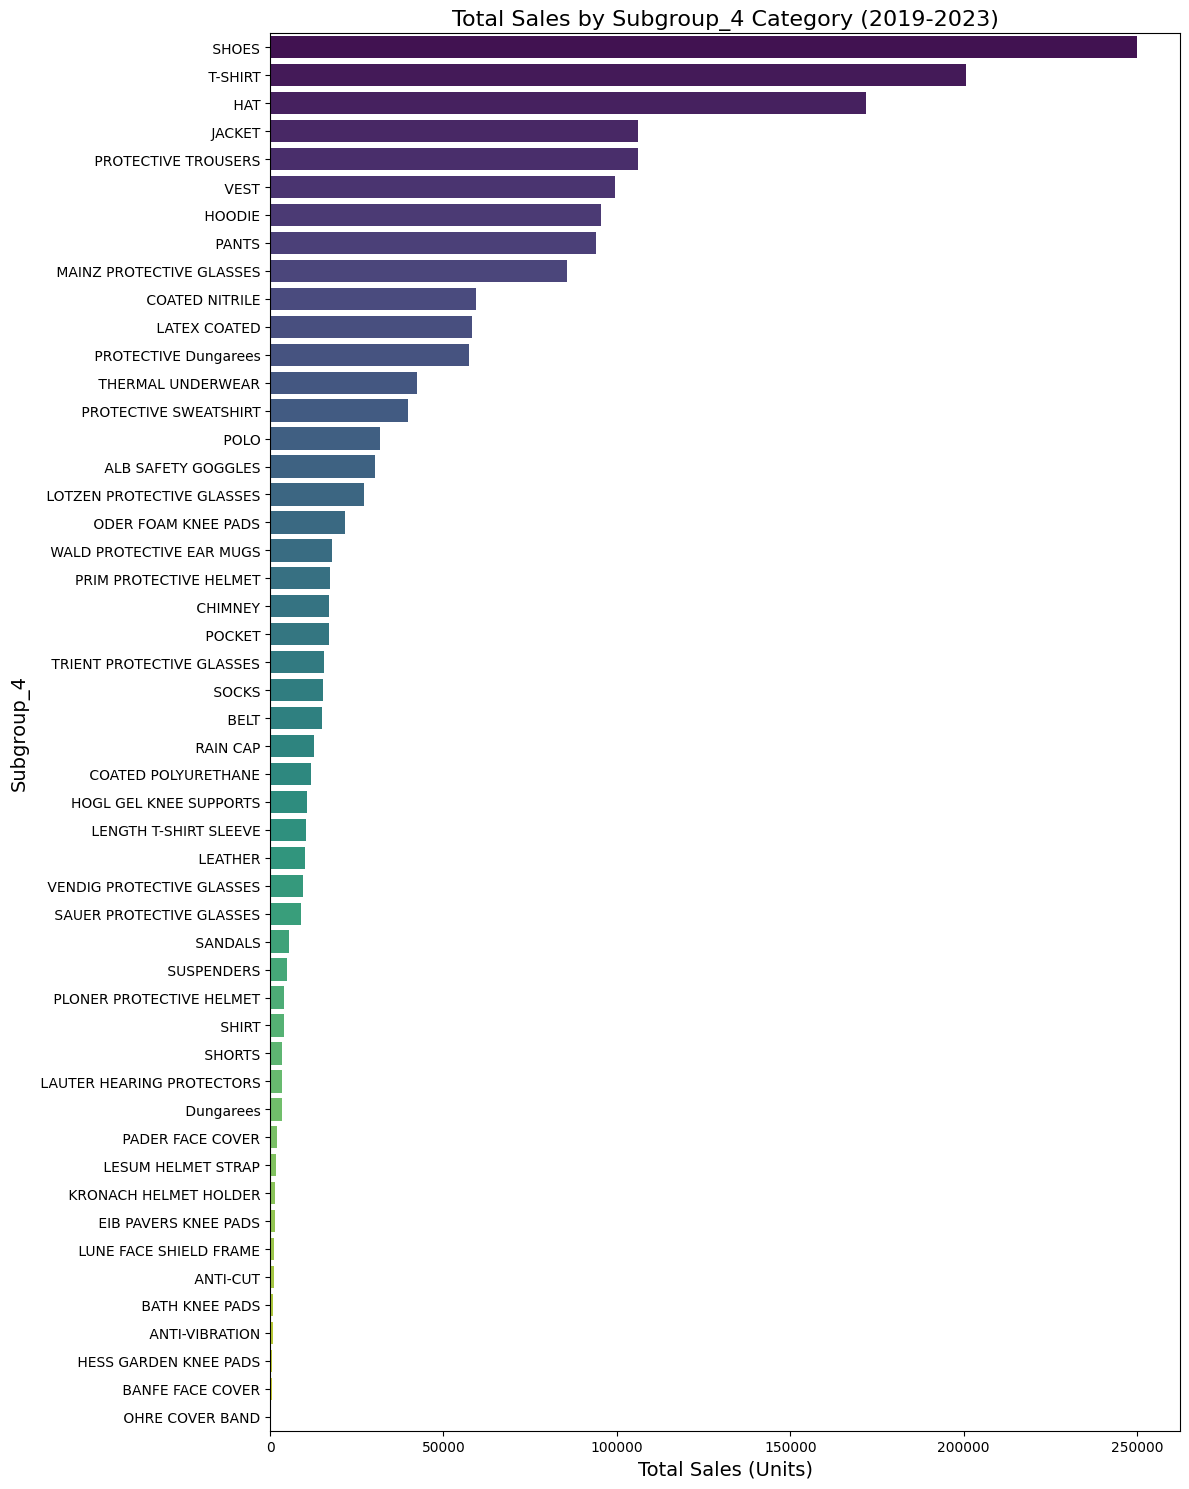

In [11]:
# Adjusting the plot to make it more readable, similar to the first graph

# Extracting the list of all monthly sales columns
monthly_columns = df.columns[df.columns.str.contains('2019|2020|2021|2022|2023')]

# Grouping the data by Subgroup_4 for analysis
subgroup_4_sales = df.groupby('Subgroup_4')[monthly_columns].sum()

# Summing up all monthly sales for each Subgroup_4
subgroup_4_total_sales = subgroup_4_sales.sum(axis=1).reset_index(name='Total Sales')

subgroup_4_total_sales_sorted = subgroup_4_total_sales.sort_values(by='Total Sales', ascending=False)


# Increasing the figure size for better readability
plt.figure(figsize=(12, 15))

# Creating the bar plot
sns.barplot(x='Total Sales', y='Subgroup_4', data=subgroup_4_total_sales_sorted, palette="viridis")

# Setting the title and labels
plt.title('Total Sales by Subgroup_4 Category (2019-2023)', fontsize=16)
plt.xlabel('Total Sales (Units)', fontsize=14)
plt.ylabel('Subgroup_4', fontsize=14)

# Improving the layout for better visibility of category names
plt.tight_layout()

# Showing the plot
plt.show()

Analyzing the `Subgroup_4` category sales from 2019 to 2023, we can deduce:

- **Footwear Takes the Lead**: "Shoes" vastly outsell other items, highlighting the critical emphasis on foot protection in safety gear markets.

- **Clothing Items are Popular**: "T-Shirt", "Hat", and "Jacket" show robust sales following "Shoes", indicating a strong market presence for general protective clothing.

- **Specific Protective Gear Has Moderate Demand**: "Mainz Protective Glasses" and "Coated Nitrile" gloves demonstrate substantial sales, suggesting a steady demand for specific safety gear.

- **Variety in Protective Eyewear**: Different protective glasses brands like "Mainz", "Lotzen", and "Trient" indicate a diverse consumer preference and the competitive nature of this market segment.

- **Lower Tier Sales Indicate Niche Use**: Items such as "Rain Cap", "Belt", and "Coated Polyurethane" have lower sales, which may point to their use in specific niches or less frequent purchase cycles.

- **Minimal Sales for Highly Specialized Items**: The least sold items, like "Ohre Cover Band" and "Hess Garden Knee Pads", suggest they cater to very specialized markets with limited demand.

In conclusion, the dominant sales of "Shoes" and general protective clothing suggest a broad market need, while the varied demand across specific safety gear indicates diverse consumer needs. The lower sales in highly specialized categories highlight potential areas for market development and customer education. 

### Conclusions from analyzation of Subgroups 

Based on the graphs generated from the sales data, several key conclusions can be drawn:

#### 1. Dominance of "Shoes" in Subgroup_4
- **Observation**: "Shoes" have the highest sales within Subgroup 4.
- **Implication**: This indicates a strong market preference or demand for shoes in this specific, more granular product category.

#### 2. "Clothes" and "Body Protection" Lead in Subgroup_3 and Subgroup_2
- **Observation**: "Clothes" and "Body Protection" show the highest sales in Subgroup 3 and Subgroup 2, respectively.
- **Implication**: When considering broader product categories, clothing items and body protection gear are more popular, suggesting a wider market appeal.

#### 3. Explaining the Discrepancy
- **Issue**: There is a discrepancy between the highest sales of "shoes" in Subgroup 4 and "clothes" or "body protection" in Subgroup 3 and 2.
- **Reason**: This is likely due to the hierarchical structure of the subgroups, with Subgroup 4 being more specific, while Subgroup 3 and 2 are broader categories.

#### 4. Market Strategy Implications
- **Strategy**: The business should tailor market strategies according to the specificity of the product categories, focusing on high-selling items like shoes in specific categories and addressing broader categories like clothes and body protection.

#### 5. Customer Behavior Insight
- **Insight**: The data suggests different customer behaviors and preferences when it comes to purchasing shoes versus clothing or body protection gear.

In summary, the data reveals significant insights into customer preferences and market demands, emphasizing the need for nuanced understanding and strategic planning in different product categories.


In [12]:
# Function to categorize products based on their names
def categorize_season(product_name):
    # Defining keywords for each season
    winter_keywords = ["winter", "cold", "thermal", "heated", "warm", "insulated"]
    summer_keywords = ["summer", "cool", "sun", "light", "breeze"]
    spring_fall_keywords = ["spring", "fall", "autumn", "rain", "wind"]

    # Converting product name to lower case for comparison
    name_lower = product_name.lower()  # This line ensures case-insensitivity

    # Categorizing based on keywords
    if any(keyword in name_lower for keyword in winter_keywords):
        return "Winter"
    elif any(keyword in name_lower for keyword in summer_keywords):
        return "Summer"
    elif any(keyword in name_lower for keyword in spring_fall_keywords):
        return "Spring/Fall"
    else:
        return "All Season"


# Applying the categorization function to the product names
df['Season'] = df['Name'].apply(categorize_season)

# Creating separate dataframes for each season
winter_df = df[df['Season'] == 'Winter']
summer_df = df[df['Season'] == 'Summer']
spring_fall_df = df[df['Season'] == 'Spring/Fall']
all_season_df = df[df['Season'] == 'All Season']

season_counts = {
    "Winter": len(winter_df),
    "Summer": len(summer_df),
    "Spring/Fall": len(spring_fall_df),
    "All Season": len(all_season_df)
}

# Example: Displaying the first few rows of the Winter dataframe
winter_df.head()


/tmp/ipykernel_8061/1626482585.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Name'].apply(categorize_season)


,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount,Season
10,ZB5K202,"LANDERN insulated protective gloves, dark blu...",D,HAND PROTECTION,GLOVES,LATEX COATED,1047,202,35,1,...,328,142,84,42,57,19,154,1,16206,Winter
34,ZB5K236,BREG neck warmer black uni,D,BODY PROTECTION,CLOTHING ACCESSORIES,CHIMNEY,0,0,0,0,...,53,55,1,26,19,1,13,35,9396,Winter
51,ZB5K243-L,WIED insulated vest graphite L (52),A,BODY PROTECTION,CLOTHES,VEST,0,0,0,0,...,112,77,19,26,15,22,55,2,6332,Winter
60,ZB5K392-XL-2XL,OSTE thermal T-shirt graphite XL-2XL,A,BODY PROTECTION,CLOTHES,THERMAL UNDERWEAR,0,0,0,0,...,146,132,0,19,2,37,63,69,5745,Winter
61,ZB5K243-XL,WIED graphite insulated vest XL (54),A,BODY PROTECTION,CLOTHES,VEST,0,0,0,0,...,108,110,15,32,14,11,53,2,5696,Winter


In [13]:
print(f"Number of Winter products: {len(winter_df)}")

Number of Winter products: 107


In [14]:
summer_df.head()

,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount,Season
3,ZB5K152,DALKE half mask with FFP2 valve light gray un...,B,RESPIRATORY PROTECTION,HALF MASKS,NaN,315,350,879,287,...,177,421,61,477,608,591,254,164,28601,Summer
25,ZB5K478,KLAUS baseball cap light gray uni,C,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,75,264,631,1074,1423,634,284,13,11333,Summer
269,ZB5K805-L,KALMIT protective trousers light gray L (52),A,BODY PROTECTION,PROTECTIVE CLOTHING,PROTECTIVE TROUSERS,0,0,0,0,...,46,28,16,44,27,21,6,4,1681,Summer
311,ZB5K805-XL,KALMIT safety pants light gray XL (54),A,BODY PROTECTION,PROTECTIVE CLOTHING,PROTECTIVE TROUSERS,0,0,0,0,...,35,18,15,27,9,9,7,1,1416,Summer
318,ZB5K312-L,FABIAN safety pants light gray L (52),D,BODY PROTECTION,PROTECTIVE CLOTHING,PROTECTIVE TROUSERS,0,0,0,0,...,50,4,42,6,7,4,1,0,1544,Summer


In [15]:
print(f"Number of Summer products: {len(summer_df)}")

Number of Summer products: 63


In [16]:
spring_fall_df.head()

,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount,Season
423,ZB5K246-XL,NIMS warning rain jacket yellow XL (54),B,BODY PROTECTION,WARNING CLOTHING,JACKET,0,0,0,0,...,16,32,50,16,13,11,32,11,983,Spring/Fall
454,ZB5K246-L,NIMS warning rain jacket yellow L (52),B,BODY PROTECTION,WARNING CLOTHING,JACKET,0,0,0,0,...,14,27,69,30,12,11,28,16,903,Spring/Fall
571,ZB5K246-2XL,NIMS warning rain jacket yellow 2XL (56),B,BODY PROTECTION,WARNING CLOTHING,JACKET,0,0,0,0,...,22,26,25,21,6,6,12,11,607,Spring/Fall
603,ZB5K246-M,NIMS warning rain jacket yellow M (50),B,BODY PROTECTION,WARNING CLOTHING,JACKET,0,0,0,0,...,8,19,36,29,6,2,9,12,549,Spring/Fall
620,ZB5K248-L,TANGER rain jacket navy blue/blue L (52),C,BODY PROTECTION,CLOTHES,JACKET,0,0,0,0,...,7,18,1,18,0,0,1,8,518,Spring/Fall


In [17]:
print(f"Number of Spring/Fall products: {len(spring_fall_df)}")

Number of Spring/Fall products: 42


In [18]:
all_season_df.head()

,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount,Season
0,ZB5K005,"MAINZ safety glasses, clear uni",A,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,931,2813,2404,2978,10925,632,340,75,48532,All Season
1,ZB5K003,ALB protective goggles transparent uni,B,EYE AND FACE PROTECTION,GLASSES,ALB SAFETY GOGGLES,122,140,810,274,...,566,744,504,641,1393,572,672,75,30408,All Season
2,ZB5K186,"ALF baseball cap, black uni",B,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,303,927,1298,2143,1047,1112,549,92,29872,All Season
4,ZB5K007,MAINZ tinted uni safety glasses,B,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,172,1542,757,1396,6058,572,291,63,22620,All Season
5,ZB5K290,ODER foam knee pads black uni (2 pcs/pack),B,LEG PROTECTION,KNEE PADS,ODER FOAM KNEE PADS,119,233,108,195,...,572,1888,1706,2174,679,464,332,46,21506,All Season


In [19]:
print(f"Number of All Season products: {len(all_season_df)}")

Number of All Season products: 818


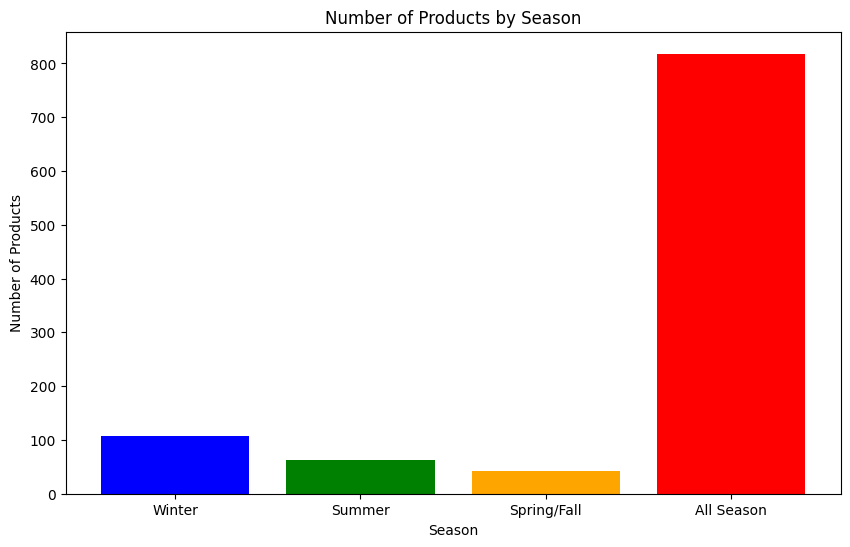

In [20]:
# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(season_counts.keys(), season_counts.values(), color=['blue', 'green', 'orange', 'red'])

plt.title('Number of Products by Season')
plt.xlabel('Season')
plt.ylabel('Number of Products')
plt.show()

- **Dominance of All-Season Products**: A significant majority of the products are categorized as 'All Season', indicating a strong focus on products that are not specific to any particular season. This could suggest a strategy that prioritizes versatile products with year-round demand.

- **Limited Season-Specific Products**: There are relatively few products specifically categorized as 'Winter', 'Summer', or 'Spring/Fall'. This might imply either a lack of focus on season-specific items or a product range that is generally more versatile and not restricted to particular weather conditions.

- **Opportunities in Seasonal Markets**: Given the smaller numbers of season-specific products, there could be opportunities to expand in these areas. For instance, if the 'Winter' category has limited products but there is a market demand, introducing more winter-specific items could tap into new customer segments.

- **Strategic Implications**: The current product mix suggests a strategy geared towards items that have consistent demand throughout the year. However, if market trends show seasonality in consumer purchasing behaviors, diversifying the product line to include more season-specific items could be beneficial.

- **Customer Segmentation**: The range and type of products offered for different seasons can also provide insights into customer segmentation. Products aimed at specific seasons may appeal to different customer demographics, and this information can be leveraged for targeted marketing and product development.

In conclusion, while the current product range is heavily skewed towards 'All Season' items, there is potential for strategic expansion and diversification into more season-specific products based on market demand and consumer trends.


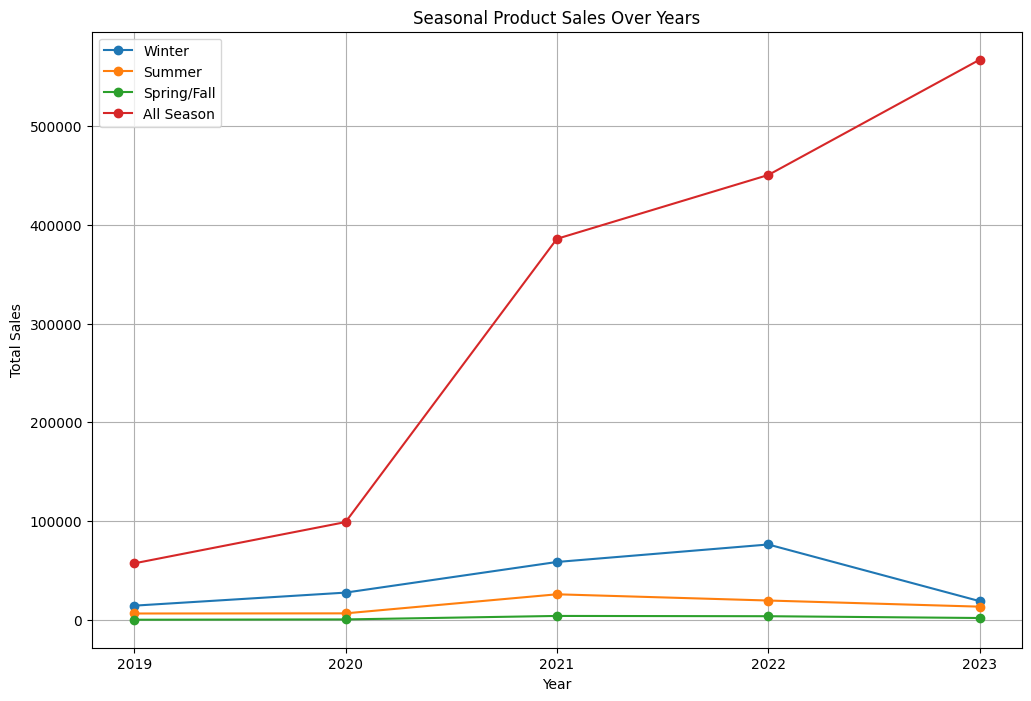

In [21]:
# Filtering columns for years and months
year_month_columns = df.columns[6:-2]  # Excluding the 'total amount' and 'Season' columns

# Function to sum sales for each year
def sum_yearly_sales(df, year):
    return df[[col for col in year_month_columns if col.startswith(str(year))]].sum(axis=1).sum()

# Summing sales for each year and season
years = range(2019, 2024)
seasonal_sales = {'Winter': [], 'Summer': [], 'Spring/Fall': [], 'All Season': []}

for year in years:
    seasonal_sales['Winter'].append(sum_yearly_sales(winter_df, year))
    seasonal_sales['Summer'].append(sum_yearly_sales(summer_df, year))
    seasonal_sales['Spring/Fall'].append(sum_yearly_sales(spring_fall_df, year))
    seasonal_sales['All Season'].append(sum_yearly_sales(all_season_df, year))

# Plotting the line graph
plt.figure(figsize=(12, 8))

for season, sales in seasonal_sales.items():
    plt.plot(years, sales, marker='o', label=season)

plt.title('Seasonal Product Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()

- **Trends Over Time**: The line graph provides a clear visual representation of how seasonal product sales have trended over the years. This is crucial for understanding long-term sales patterns and making informed decisions about stock and marketing strategies.

- **Seasonal Variability**: The analysis may reveal significant variability in sales for season-specific products (Winter, Summer, Spring/Fall) across different years. This could be influenced by factors like weather patterns, economic conditions, and market trends.

- **All-Season Product Stability**: If 'All Season' products show a steady line or consistent growth, it indicates stable demand and less susceptibility to seasonal fluctuations. This stability is beneficial for predictable revenue streams.

- **Growth or Decline Indicators**: Any noticeable growth or decline in sales for specific seasons can signal changing market preferences or the effectiveness of past business strategies.

- **Inventory Planning**: Understanding which seasons have the highest sales can help in planning inventory more effectively. For instance, if winter products show an increase in sales, it might be prudent to increase stock before the onset of winter.

- **Market Opportunities**: Identifying seasons with lower sales might indicate untapped market potential or the need for more targeted marketing efforts during those times.

- **Year-to-Year Comparisons**: The year-wise comparison helps in understanding how external factors (like new product launches, marketing campaigns, or economic changes) have impacted sales.

- **Predictive Analysis for Future Trends**: The historical sales data can be used for predictive analysis, helping to forecast future sales trends and plan accordingly.

In conclusion, this analysis of seasonal product sales provides valuable insights into consumer behavior and market trends, which are essential for strategic planning and operational efficiency in retail and inventory management.


## External Factors

When it comes to analyzation of sales data about amount of sales is not enough, because we don't have any variables we can correlate our sales to. 
Let's now focus of Economic factors which are one of the most important factors when it comes to sales.
Because company "XYZ" is based in Poland, our external factors data should be accordingly to Poland.

When it comes to sales of protective gear we can distinguish a couple of most important economic factors which have influence on sales 


### Inflation

One of the main Economic factors is Inflation, especially nowadays Poland and whole Europe experiencing high inflation rates consequently increase of prices and costs of living, let's read monthly inflation data and show it on plot for analyze.

In [22]:
inflation_data = pd.read_csv('../Datasets/Inflation data/Inflation Poland.csv')

print(inflation_data.head())

   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0    100.7    101.2    101.7    102.2    102.4    102.6    102.9    102.9   

   2019-09  2019-10  ...  2022-12  2023-01  2023-02  2023-03  2023-04  \
0    102.6    102.5  ...    116.6    116.6    118.4    116.1    114.7   

   2023-05  2023-06  2023-07  2023-08  2023-09  
0      113    111.5    110.8    110.1      NaN  

[1 rows x 57 columns]


In [23]:
df_inflation = pd.DataFrame(inflation_data)
df_inflation

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,100.7,101.2,101.7,102.2,102.4,102.6,102.9,102.9,102.6,102.5,...,116.6,116.6,118.4,116.1,114.7,113,111.5,110.8,110.1,NaN


As we can see we only have data till August of this year

This code snippet is for reshaping and plotting inflation data:

1. The DataFrame `df_inflation` is transformed to a long format with the `melt` function, resulting in a 'Date' column and an 'Inflation Value' column.
2. The 'Date' column is then converted to the datetime data type, enhancing the plot's time axis accuracy.
3. A line plot is created using pandas' built-in plotting capabilities, plotting 'Inflation Value' against 'Date'.
4. The plot size is set to 14x7 inches, and grid lines are enabled for better visualization.
5. The title 'Inflation Trend in Poland (Jan 2019 - Aug 2023)' clearly describes the data's time range and the economic indicator being analyzed.
6. The x-axis is labeled 'Date', and the y-axis is labeled 'Inflation Value', clarifying what is plotted on each axis.

This visualization is instrumental in observing the inflation trends over the specified period in Poland, allowing for an easy assessment of how inflation values have changed over time.


Text(0, 0.5, 'Inflation Value')

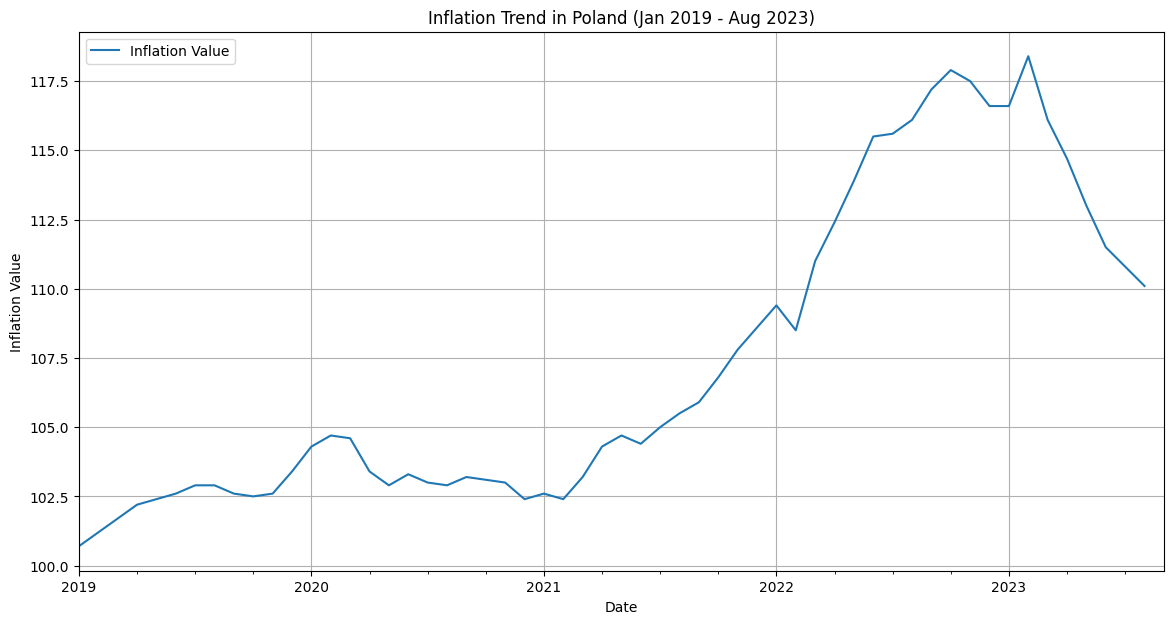

In [24]:
# Reshape the dataframe to long format
df_long = df_inflation.melt(var_name='Date', value_name='Inflation Value')

# Convert the 'Date' column to datetime format for better plotting
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Plot the graph using pandas plotting functionality
ax = df_long.plot(x='Date', y='Inflation Value', figsize=(14, 7), grid=True, title='Inflation Trend in Poland (Jan 2019 - Aug 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Value')

### Analysis of Inflation Trends in Poland (Jan 2019 - Aug 2023)

#### General Observations
- **Upward Trend**: Inflation in Poland shows a general increase from 2019 to 2023, indicating rising prices over time.
- **Stability in Early Phase**: Initial stability in inflation (early 2019 to early 2020) suggests a period of economic steadiness.

#### Key Changes
- **Sharp Increase Post-2020**: A significant rise in inflation is observed starting in 2020, which could be linked to external factors like the COVID-19 pandemic or economic policies.
- **Fluctuations**: The trend is marked by periodic fluctuations, indicating varying rates of inflation growth.

#### Recent Trends
- **Volatility in 2022-2023**: More pronounced volatility in the later years may reflect economic instability or global influences.
- **Data Incompleteness**: The graph ends in September 2023 with missing data, requiring cautious interpretation.




### Unemployment rate

Unemployment rate is very influential on whole economy of country and on economic growth including new investments and whole service sector consequently sales for individual or companies can be lower with higher unemployment rate.

Let's read data and show it on graph

In [25]:
unemployment_data = pd.read_csv('../Datasets/Unemployment rate/Unemployment rate Poland.csv')

print(unemployment_data.head())

   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0      6.1      6.1      5.9      5.6      5.4      5.3      5.2      5.2   

   2019-09  2019-10  ...  2022-12  2023-01  2023-02  2023-03  2023-04  \
0      5.1        5  ...      5.2      5.5      5.5      5.4      5.2   

   2023-05  2023-06  2023-07  2023-08  2023-09  
0      5.1        5        5      NaN      NaN  

[1 rows x 57 columns]


In [26]:
df_unemployment = pd.DataFrame(unemployment_data)
df_unemployment 

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,6.1,6.1,5.9,5.6,5.4,5.3,5.2,5.2,5.1,5,...,5.2,5.5,5.5,5.4,5.2,5.1,5,5,NaN,NaN


We can see that we only have data till July of this year

The code snippet processes and visualizes unemployment data:

1. The `df_unemployment` DataFrame is reshaped into a long format using the `melt` method. This creates two columns: 'Date' for the time dimension and 'Unemployment Value' for the unemployment statistics.
2. The 'Date' column is then converted to a datetime format, which allows for more accurate and meaningful plotting over time.
3. Using pandas' plotting tools, the data is displayed in a line graph with the 'Date' column on the x-axis and 'Unemployment Value' on the y-axis.
4. The figure size is set to 14x7 inches, and a grid is added for easier data point reading.
5. The graph is titled 'Unemployment Trend in Poland (Jan 2019 - 2023)', clearly indicating the subject and the time frame of the data.
6. X-axis and y-axis are labeled 'Date' and 'Unemployment Value', respectively, to clearly indicate what the axes represent.

This plot provides a visual representation of the unemployment trends over time in Poland, from January 2019 to 2023.


Text(0, 0.5, 'Unemployment Value')

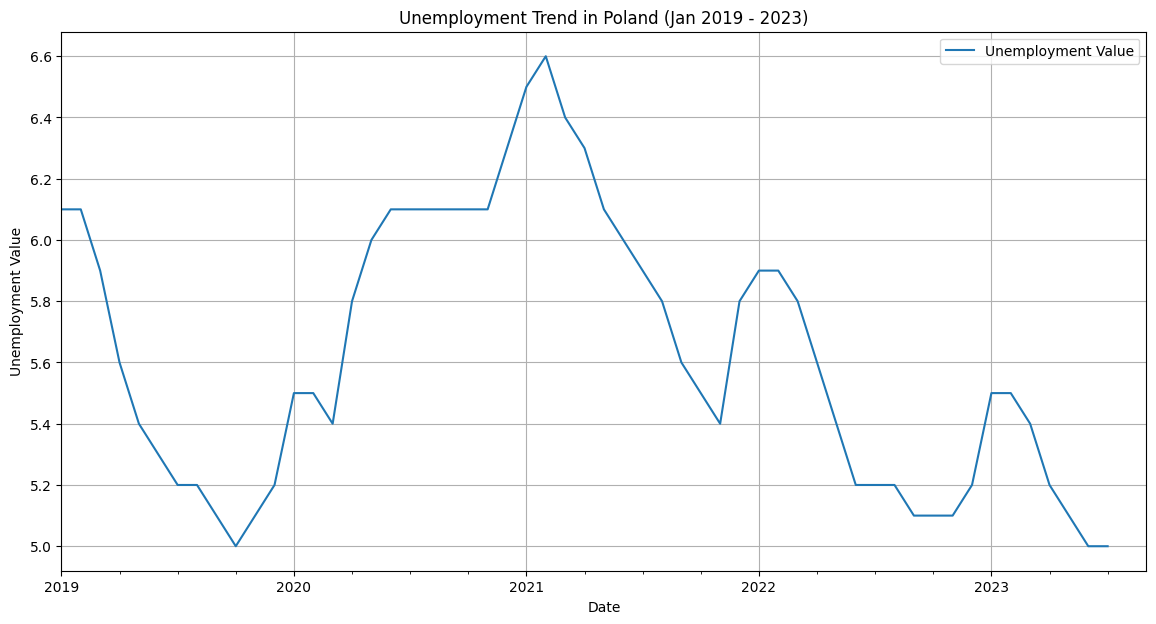

In [27]:
# Reshape the dataframe to long format
data_transposed = df_unemployment.melt(var_name='Date', value_name='Unemployment Value')

# Convert the 'Date' column to datetime format for better plotting
data_transposed['Date'] = pd.to_datetime(df_long['Date'])

# Plot the graph using pandas plotting functionality
ax = data_transposed.plot(x='Date', y='Unemployment Value', figsize=(14, 7), grid=True, title='Unemployment Trend in Poland (Jan 2019 - 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Value')


### Temperature Data

Temperature Data is relevant in this case because some products are seasonal for e.g. outdoors protective gear can have additional thermal isolation, It's not as important as external economic factors but still relevant for our model. 

Let's read the data and show it on the graph


In [28]:
temparteure_data = pd.read_csv('../Datasets/TemperatureData/aggregatedDataTemperature.csv', encoding="ISO-8859-1")
print(temparteure_data.head())

   Year  Month  Avg Temp [°C]
0  2019      1      -3.069118
1  2019      2       1.885075
2  2019      3       4.737879
3  2019      4       8.734848
4  2019      5      11.668182


In [29]:
df_temparteure = pd.DataFrame(temparteure_data)
df_temparteure

,Year,Month,Avg Temp [°C]
0,2019,1,-3.069118
1,2019,2,1.885075
2,2019,3,4.737879
3,2019,4,8.734848
4,2019,5,11.668182
5,2019,6,20.843750
6,2019,7,18.079687
7,2019,8,18.996923
8,2019,9,13.167692
9,2019,10,9.652308


The code snippet is designed to process and visualize temperature data over time:

1. A new 'Date' column is created in the `df_temperature` DataFrame by combining 'Year' and 'Month' columns and setting the day to the first of the month. This is done using pandas' `to_datetime` method for easier plotting along a timeline.
2. The temperature data is then plotted directly using pandas' built-in plotting function. The plot uses the new 'Date' column for the x-axis and 'Avg Temp [°C]' column for the y-axis.
3. The plot is configured to be 15x7 inches, with each data point marked by a circle ('o') and connected with a line ('-').
4. It is titled 'Average Monthly Temperature Over Time' and includes a grid for better readability.
5. Axes labels are explicitly set to 'Date' for the x-axis and 'Avg Temp [°C]' for the y-axis, indicating that the plot shows average temperatures over time.
6. Finally, `pd.plotting` appears to be an incomplete line of code. If the intention was to show the plot, this line is not necessary because the plot is already displayed by the previous line.

This visualization provides a clear trend of average monthly temperatures, helping to observe changes and patterns over time.


<module 'pandas.plotting' from '/home/michal/.local/lib/python3.10/site-packages/pandas/plotting/__init__.py'>

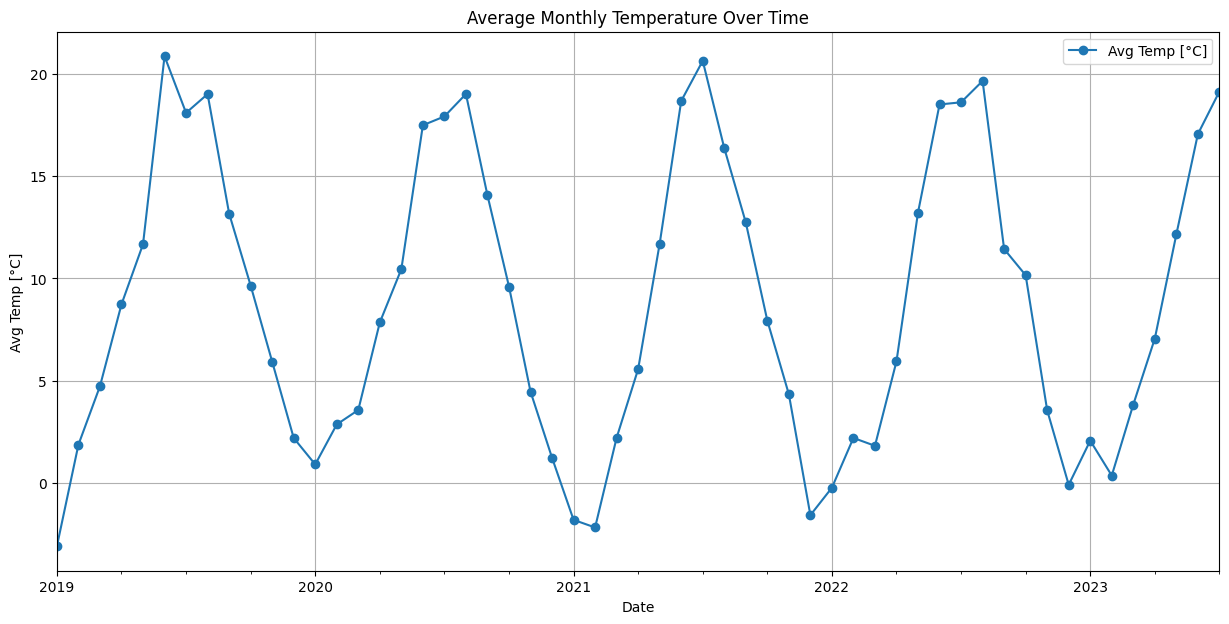

In [30]:
# Create a new column 'Date' combining the Year and Month columns for plotting
df_temparteure['Date'] = pd.to_datetime(df_temparteure[['Year', 'Month']].assign(DAY=1))

# Plotting the data using only pandas' built-in plotting capabilities
df_temparteure.plot(x='Date', y='Avg Temp [°C]', figsize=(15, 7), marker='o', linestyle='-', title='Average Monthly Temperature Over Time', grid=True, xlabel='Date', ylabel='Avg Temp [°C]')

# Display the plot
pd.plotting


We can clearly see natural cycle of the year

### Analyzation 
Lets now draw all data on one graph to see how they are looking with each other and if we can see any pattern, we have to standardize data to draw them on one graph

In [31]:
df = pd.read_csv('../Datasets/Aggregated data/Aggregated.csv')
df

,,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
0,Sales,1967.000000,2184.000000,4238.000000,2878.000000,3815.000000,4197.00000,5914.000000,7052.000000,9299.000000,...,78917.000000,69386.000000,44531.000000,37725.000000,34223.000000,62632.000000,95872.000000,96280.00,113509.000000,70998.000000
1,Inflation,100.700000,101.200000,101.700000,102.200000,102.400000,102.60000,102.900000,102.900000,102.600000,...,117.900000,117.500000,116.600000,116.600000,118.400000,116.100000,114.700000,113.00,111.500000,110.800000
2,Unemployment,6.100000,6.100000,5.900000,5.600000,5.400000,5.30000,5.200000,5.200000,5.100000,...,5.100000,5.100000,5.200000,5.500000,5.500000,5.400000,5.200000,5.10,5.000000,5.000000
3,Temperature,-3.069118,1.885075,4.737879,8.734848,11.668182,20.84375,18.079687,18.996923,13.167692,...,10.156364,3.565385,-0.073077,2.082692,0.378846,3.844231,7.065385,12.15,17.042308,19.121569


### Scaling
Because each data is in different format, we scale it to show it on graph for clear representation

The code snippet conducts data transformation and visualization on a pandas DataFrame:

1. The DataFrame `df` is transposed after setting the first column as the index, resulting in `df_transposed` for more convenient plotting.
2. Standardization of the data is performed by applying a lambda function that calculates the z-score for each value.
3. The standardized data, `df_standardized_pandas`, is then plotted using pandas' built-in plot function with a figure size of 15x8 inches and a grid.
4. Each data point is marked with a circle ('o') on the plot.
5. The plot is titled "Standardized Metrics from 2019 to 2023" and the axes are labeled appropriately with "Month-Year" for the x-axis and "Standardized Value (z-score)" for the y-axis.
6. A legend is placed in the upper left corner for easy identification of different metrics.

This visualization helps to compare standardized metrics over time, normalizing for differences in scale among metrics from 2019 to 2023.


**Standardization** *is a statistical technique that involves rescaling the distribution of values in a dataset so that the mean of the observed values is 0 and thestandard deviation is 1. This process converts different scales of data to a common scale, making it easier to compare and analyze. Standardization is particularly useful in data analysis methods that assume normally distributed data, such as many machine learning algorithms. It ensures that each feature contributes equally to the analysis and helps to improve the performance of the algorithms by giving features with larger ranges of values no more weight than features with smaller ranges.*

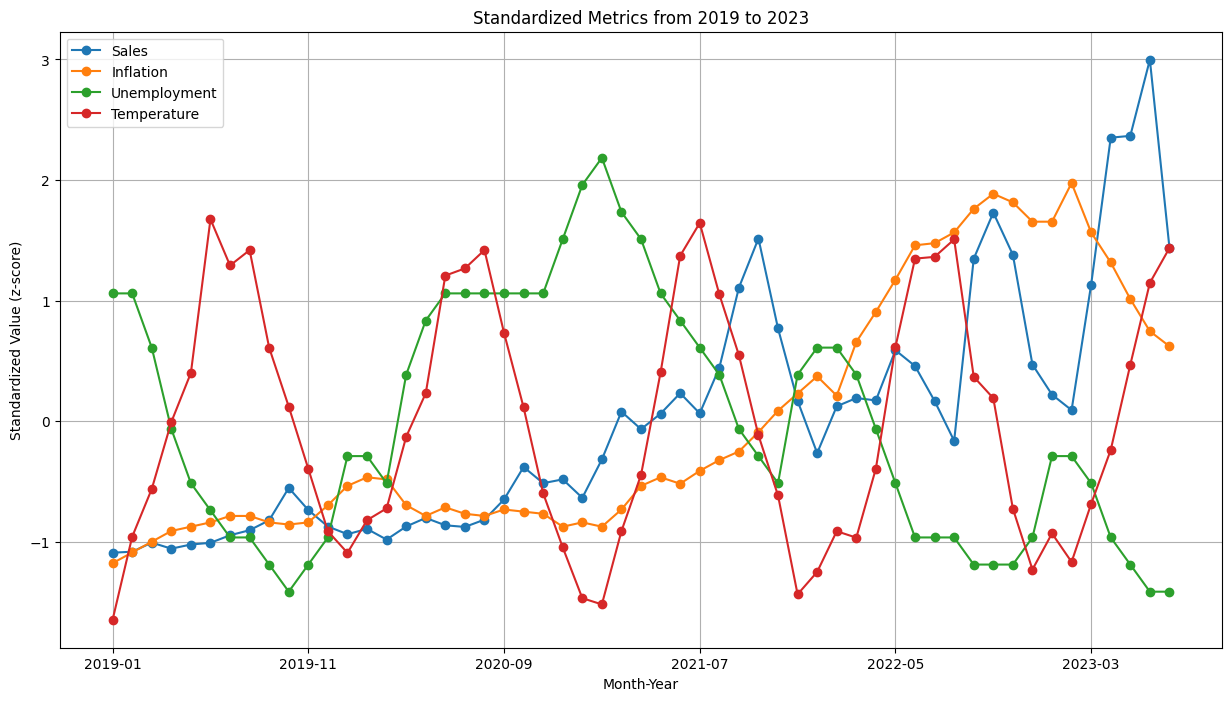

In [32]:
# Transpose the dataframe for easier plotting
df_transposed = df.set_index(df.columns[0]).transpose()

# Standardize the data using pandas methods directly
df_standardized_pandas = df_transposed.apply(lambda x: (x - x.mean()) / x.std())

# Plot the standardized data using pandas plotting
ax = df_standardized_pandas.plot(figsize=(15, 8), marker='o', grid=True)
ax.set_title("Standardized Metrics from 2019 to 2023")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Standardized Value (z-score)")
ax.legend(loc="upper left")


We can see pattern of all data on graph e.g. we can see that when unemployment was high sales were low

Let's now draw heat map to see the most important features 

The given code snippet is used for calculating and visualizing a correlation matrix with seaborn, a Python data visualization library.

1. `corr` method is called on `df_transposed` to compute the correlation matrix, storing it in `correlation_matrix`.
2. Seaborn's configuration is set to adjust the figure size to 8x6 inches.
3. A heatmap is generated to visualize the `correlation_matrix` with annotations displayed.
4. The color map 'coolwarm' is used, with the color range set between -1 and 1, indicating the strength of correlations.
5. The heatmap is made square with a line width of 0.5 for separation and the color bar is shrunk to 75% of its height.
6. The plot is titled 'Correlation Heatmap'.

This visualization is useful for identifying the strength and direction of the relationship between variables in `df_transposed`.


Text(0.5, 1.0, 'Correlation Heatmap')

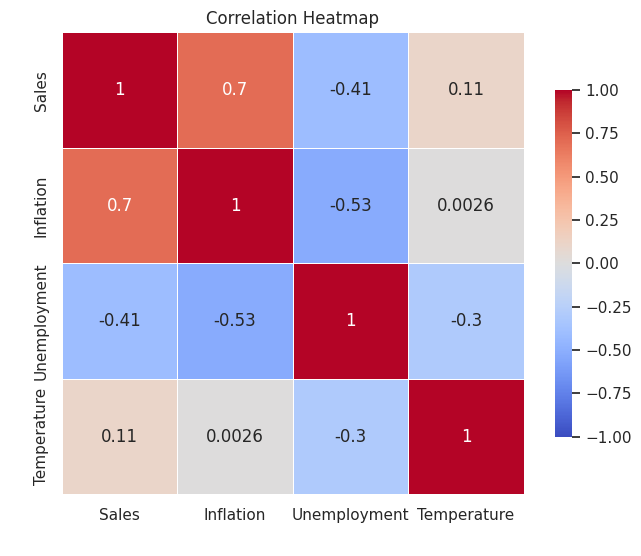

In [33]:
correlation_matrix = df_transposed.corr()
# Visualize the correlation heatmap using seaborn
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": 0.75}).set_title('Correlation Heatmap')
    

We can see that coloration between sales and inflation is high, and between sales and unemployment we also see coloration, unfortunately there is no big coloration between sales and temperature, even though we expected coloration caused by seasonal products

# Building Model
Here we are going to consider, choose and build the best machine learning solution for sales prediction 

### Transpose Data
Because our aggregated data has dates in columns, and values in rows we are going to transpose our data for easier manipulation, it's going to be useful despite kind of chosen algorithm

The code snippet below outlines the process of data transformation and saving it back to CSV format in Python, using pandas and the `sklearn.model_selection` and `sklearn.metrics` modules for potential later use in model training and evaluation.

1. Functions `train_test_split` for splitting the dataset and performance metrics like `mean_squared_error` and `r2_score` for model evaluation are imported but not used directly in the snippet.
2. The original DataFrame `df` is transposed to switch rows with columns, which can be a necessary step depending on the structure of the data and the desired format for modeling.
3. The new column names for the `transposed_data` DataFrame are set based on its first row, which typically contains the original column headers.
4. The first row, now redundant after renaming the columns, is dropped from `transposed_data`.
5. The DataFrame index is reset to ensure it starts from 0, and the index column is renamed to 'Date', which is often required for time series data to identify the timeline.
6. The `head` method is called to display the first few rows of the transformed DataFrame for a quick inspection.
7. Finally, the `transposed_data` DataFrame is saved to a CSV file named "DataSet.csv" using ISO-8859-1 encoding to accommodate special characters.

This sequence of data manipulation steps is essential for preparing the dataset in a structure that is suitable for further analysis or modeling.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Transpose the data
transposed_data = df.transpose()

# Rename the columns based on the first row
transposed_data.columns = transposed_data.iloc[0]
transposed_data = transposed_data.drop(transposed_data.index[0])

# Reset index
transposed_data.reset_index(inplace=True)
transposed_data.rename(columns={'index': 'Date'}, inplace=True)

transposed_data.to_csv("DataSet.csv", encoding="ISO-8859-1", index=False)

transposed_data.head()


,Date,Sales,Inflation,Unemployment,Temperature
0,2019-01,1967.0,100.7,6.1,-3.069118
1,2019-02,2184.0,101.2,6.1,1.885075
2,2019-03,4238.0,101.7,5.9,4.737879
3,2019-04,2878.0,102.2,5.6,8.734848
4,2019-05,3815.0,102.4,5.4,11.668182


The code snippet below demonstrates the steps for converting date data to a datetime format and checking for missing values in a DataFrame using Python's pandas library.

1. The 'Date' column of the `transposed_data` DataFrame is converted to datetime objects using the `pd.to_datetime` method. This conversion is essential for time series analysis as it ensures that dates are in a consistent format that can be understood by time series modeling tools.
2. The `isnull` method followed by the `sum` function is applied to `transposed_data` to count the number of missing values in each column. This is a crucial step for data cleaning and quality assurance before any analysis or modeling.
3. The resulting series `missing_values`, which contains the count of missing values per column, is displayed. Understanding the presence and extent of missing data helps in determining the necessary preprocessing steps, such as imputation or removal of missing data points.

By executing these steps, one can ensure that the dataset is ready and reliable for subsequent stages of time series analysis or modeling, with date information correctly formatted and missing values identified.


In [35]:
# Convert the 'Date' column to datetime
transposed_data['Date'] = pd.to_datetime(transposed_data['Date'])

# Check for missing values
missing_values = transposed_data.isnull().sum()

missing_values


 
Date            0
Sales           0
Inflation       0
Unemployment    0
Temperature     0
dtype: int64

The code snippet below illustrates the process of feature engineering on time series data, specifically by enriching the dataset with time-related attributes derived from the 'Date' column.

1. A new column 'Year' is created in the `transposed_data` DataFrame by extracting the year from each date in the 'Date' column using the `dt.year` attribute of pandas.
2. Similarly, a 'Month' column is added by extracting the month from each date in the 'Date' column using the `dt.month` attribute.
3. After introducing these new time-related features, the `head` method is called to display the first few rows of the `transposed_data` DataFrame, providing a preview of the updated dataset with the newly engineered features.

These steps are a common practice in time series analysis and machine learning, where additional features like 'Year' and 'Month' can provide valuable information to help models capture seasonal trends and patterns more effectively.


In [36]:
# Feature Engineering: Extract month and year from 'Date'
transposed_data['Year'] = transposed_data['Date'].dt.year
transposed_data['Month'] = transposed_data['Date'].dt.month

# Now that we have added new features, let's look at the first few rows of the updated dataframe
transposed_data.head()


,Date,Sales,Inflation,Unemployment,Temperature,Year,Month
0,2019-01-01,1967.0,100.7,6.1,-3.069118,2019,1
1,2019-02-01,2184.0,101.2,6.1,1.885075,2019,2
2,2019-03-01,4238.0,101.7,5.9,4.737879,2019,3
3,2019-04-01,2878.0,102.2,5.6,8.734848,2019,4
4,2019-05-01,3815.0,102.4,5.4,11.668182,2019,5


# Splitting Data

First, we need to split data in to two sets, the train set and test set for algorithm to learn form train set and its test comparing to test set


The code snippet demonstrates the preparation and splitting of a dataset into training and testing sets for machine learning in Python, utilizing functionalities from the `sklearn.model_selection` module.

1. The `train_test_split` function is imported, which is a utility for dividing datasets into train and test subsets.
2. Features `X` and the target `y` are defined, with `X` being all columns except 'Date' and 'Sales', and `y` being the 'Sales' column converted to numeric.
3. The `train_test_split` function is then called with a `test_size` of 0.2 and a `random_state` of 42, ensuring that 20% of the data is used as a test set and the split is reproducible.
4. The resulting split provides `X_train` and `y_train` for model training, and `X_test` and `y_test` for model testing, with their respective shapes being outputted to verify the split.

By following these steps, the dataset is ready for the next stages of machine learning, which include model training and evaluation.


In [37]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = transposed_data.drop(columns=['Date', 'Sales'])  # Drop the 'Sales' and 'Date' columns for features
y = pd.to_numeric(transposed_data['Sales']) # 'Sales' is the target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((44, 5), (11, 5), (44,), (11,))

## Cross validation 
Here are scripts for cross validation of time series models, they are here because they are functions, which can be used later in the notebook 


In [38]:
def cross_validator(X, y, model):
    tscv = TimeSeriesSplit()
    mse_scores = []
    r2_scores = []
    print(tscv)

    TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

    for i, (train_index, test_index) in enumerate(tscv.split(X)):
 


        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Predict and calculate the error
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Average scores across all splits
    average_mse = np.mean(mse_scores)
    average_r2 = np.mean(r2_scores)

    return mse_scores, r2_scores

## Linear Regression

Linear regression is used for time series data to discern and quantify the linear trend over time, offering a straightforward way to predict future values. Its simplicity ensures computational efficiency and interpretability. Given these benefits, we will employ linear regression to predict future sales.

This code snippet below details the training and evaluation process for a Linear Regression model using the scikit-learn library. The process includes:

1. Initializing the Linear Regression model.
2. Fitting the model with training data.
3. Predicting sales on test data.
4. Calculating evaluation metrics: MSE, MAE, RMSE, and R².

The comments provided in the code offer a straightforward guide through each step, ensuring clarity in the model's application for sales prediction.


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_regressor.predict(X_test)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

lr_cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5)

# Assemble the error metrics
error_metrics_lr= {
    'Mean Absolute Error (MAE)': mae_lr,
    'Mean Squared Error (MSE)': mse_lr,
    'Root Mean Squared Error (RMSE)': rmse_lr,
    'R-squared (R²)': r2_lr
}


with open('linear_regressor.pkl', 'wb') as file:
    pickle.dump(linear_regressor, file) 


with open('../Application/models/linear_regressor.pkl', 'wb') as file:
    pickle.dump(linear_regressor, file) 

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(linear_regressor, X_train, y_train, cv=tscv, scoring="r2")

print(scores.mean())

cross_validator(X,y,linear_regressor)

error_metrics_lr



NameError: name 'X_train' is not defined

The code snippet below performs the following operations:

1. Generates predictions for the test data using the trained Linear Regression model.
2. Constructs a DataFrame to compare the true values against the predicted values.
3. Calculates the prediction error as the absolute difference between true and predicted values, converting the error to an integer type.
4. Resets the index of the DataFrame for a clean presentation.

This organized structure allows for an easy assessment of the model's prediction accuracy on the test data.

In [40]:
predictions = linear_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"].astype(int))
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

,truth,prediction,error
0,43793.0,36949.901938,6843
1,4197.0,2440.556088,1756
2,61916.0,41891.464362,20024
3,7341.0,11778.339133,4437
4,9438.0,16451.580962,7013
5,34223.0,53194.944310,18971
6,44196.0,46119.792814,1923
7,33877.0,24437.957357,9439
8,27274.0,49498.434708,22224
9,6155.0,10510.449045,4355


The given code block below imports necessary libraries and performs the following tasks:

1. Calculates the Maximum Error (Max Error) between the actual and predicted values, and then applies the ceiling function to round it up to the nearest integer. This metric provides insight into the worst-case error in the predictions.
2. Computes the Mean Squared Error (MSE) and then the Root Mean Squared Error (RMSE), also rounding it up to the nearest integer. The RMSE gives a sense of the magnitude of error across all predictions.

These metrics are printed out, giving a quick evaluation of the model's performance on the test data in terms of its prediction errors.


In [41]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 26921
Root Mean Squared Error: 14175


The code snippet below is designed to visually compare the actual and predicted sales figures:

1. It initializes a DataFrame that juxtaposes the actual sales (`y_test`) with the predicted values (`y_pred`).
2. The DataFrame is then sorted by its index to ensure the alignment of data points.
3. A matplotlib figure is created with a size of 14x7 inches for clear visualization.
4. The actual sales are plotted as a blue line, and the predicted sales are plotted as a dashed red line.
5. The plot is titled 'Actual vs Predicted Sales' and includes labels for both the x-axis (Index) and the y-axis (Sales).
6. A legend is added to differentiate between the actual and predicted lines.
7. The plot is displayed with `plt.show()`.

This visualization provides an intuitive comparison of the model's predictions against the actual sales data.

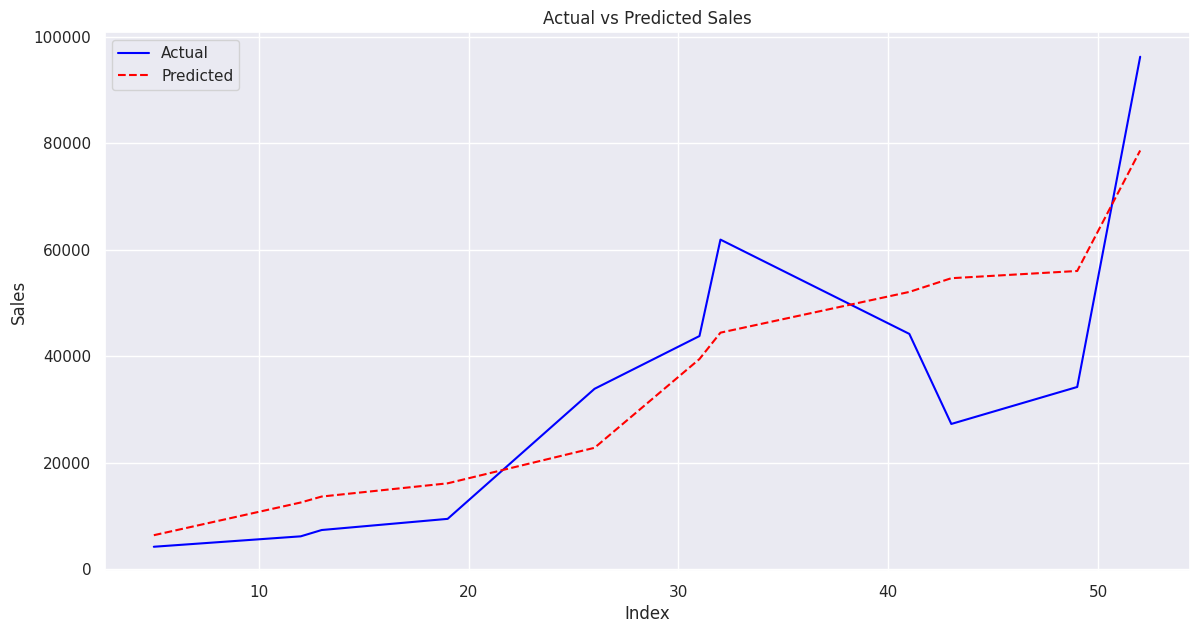

In [42]:
# Creating a DataFrame to align the predictions with the actual sales
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df = comparison_df.sort_index()  # Sort by index to align the predictions correctly

plt.figure(figsize=(14, 7))

# Actual values in blue
plt.plot(comparison_df.index, comparison_df['Actual'], color="blue", label="Actual")

# Predicted values in red
plt.plot(comparison_df.index, comparison_df['Predicted'], color="red", label="Predicted", linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot visualizes the actual vs. predicted sales, with the actual sales depicted in blue and the predicted in red dashes. The degree of overlap between the two lines indicates the model's prediction accuracy, with a closer overlap representing higher accuracy.

The given code snippet below creates a visualization using seaborn, a Python data visualization library.

1. `regplot` is called to generate a scatter plot with a linear regression line.
2. Inputs for the plot are the flattened arrays of actual (`y_test`) and predicted (`predictions`) prices.
3. The regression line is set to appear in red.
4. Axis labels are added for clarity: "predicted price" on the x-axis and "true price" on the y-axis.

This visualization helps in assessing the accuracy of a regression model by comparing predicted values against actual values.


<Axes: xlabel='predicted price', ylabel='true price'>

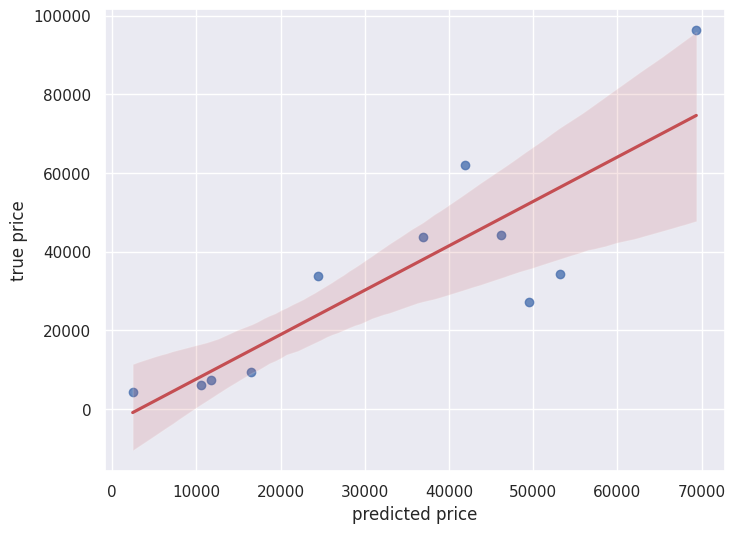

In [43]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted price")
plot.set_ylabel("true price")
plot

The regression plot shows the correlation between predicted and actual sales. The proximity of the data points to the red line, which represents the best fit, indicates prediction accuracy. Points closely clustered around the line suggest high accuracy, while points farther from the line signal larger prediction errors.

## Decision Tree Regression

Decision Tree Regression is chosen for time series data to model the intricate, non-linear dynamics that influence sales, despite its typical non-use for such data due to lacking temporal trend capture. Its ability to handle a multitude of variable interactions makes it a robust predictor when time elements are engineered into the features. For its interpretability and decision-path clarity, we will utilize Decision Tree Regression to forecast future sales.


The code snippet demonstrates the process of using a Decision Tree Regressor for machine learning tasks in Python, utilizing the `sklearn` library.

1. A `DecisionTreeRegressor` is initialized with a set random state for reproducibility.
2. The model is trained using the `fit` method with `X_train` and `y_train` data.
3. Predictions are made on the test dataset `X_test`, resulting in `y_pred_dt`.
4. Performance metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the coefficient of determination (R²), are computed using the true values `y_test` and the predicted values `y_pred_dt`.
5. These error metrics are then organized into a dictionary named `error_metrics_dt` for easy reference.

The comments in the code provide a clear understanding of each step in the machine learning pipeline, from model initialization to performance evaluation. They are sufficiently informative for someone familiar with the `sklearn` library and machine learning concepts.


In [44]:
from sklearn.tree import DecisionTreeRegressor


# Initialize the Decision Tree Regressor model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
# `random_state` is 42 becouse 42 is the Answer to the Ultimate Question of Life, the Universe, and Everything

# Train the model on the training data
decision_tree_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree_regressor.predict(X_test)

# Calculate performance metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

dt_cv_scores = cross_val_score(decision_tree_regressor, X, y, cv=5)



# Assemble the error metrics
error_metrics_dt = {
    'Mean Absolute Error (MAE)': mae_dt,
    'Mean Squared Error (MSE)': mse_dt,
    'Root Mean Squared Error (RMSE)': rmse_dt,
    'R-squared (R²)': r2_dt
}

with open('decision_tree_regressor.pkl', 'wb') as file:
    pickle.dump(decision_tree_regressor, file) 

with open('../Application/models/decision_tree_regressor.pkl', 'wb') as file:
    pickle.dump(decision_tree_regressor, file) 

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(decision_tree_regressor, X_train, y_train, cv=tscv, scoring="r2")
print(scores.mean())

cross_validator(X,y,decision_tree_regressor)

error_metrics_dt

-0.483452250765648
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


{'Mean Absolute Error (MAE)': 9046.545454545454,
 'Mean Squared Error (MSE)': 159064237.63636363,
 'Root Mean Squared Error (RMSE)': 12612.067143666958,
 'R-squared (R²)': 0.7779069819700368}

The code snippet below performs the following operations:

1. Generates predictions for the test data using the trained Decision Tree Regression model.
2. Constructs a DataFrame to compare the true values against the predicted values.
3. Calculates the prediction error as the absolute difference between true and predicted values, converting the error to an integer type.
4. Resets the index of the DataFrame for a clean presentation.

This organized structure allows for an easy assessment of the model's prediction accuracy on the test data.

In [45]:
predictions = decision_tree_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"].astype(int))
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

,truth,prediction,error
0,43793.0,43793.0,0
1,4197.0,4197.0,0
2,61916.0,61916.0,0
3,7341.0,7341.0,0
4,9438.0,9438.0,0
5,34223.0,24500.0,9723
6,44196.0,44196.0,0
7,33877.0,33877.0,0
8,27274.0,27274.0,0
9,6155.0,6155.0,0


The given code block below imports necessary libraries and performs the following tasks:

1. Calculates the Maximum Error (Max Error) between the actual and predicted values, and then applies the ceiling function to round it up to the nearest integer. This metric provides insight into the worst-case error in the predictions.
2. Computes the Mean Squared Error (MSE) and then the Root Mean Squared Error (RMSE), also rounding it up to the nearest integer. The RMSE gives a sense of the magnitude of error across all predictions.

These metrics are printed out, giving a quick evaluation of the model's performance on the test data in terms of its prediction errors.

In [46]:
me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 48503
Root Mean Squared Error: 14916


The code snippet below is designed to visually compare the actual and predicted sales figures:

1. It initializes a DataFrame that juxtaposes the actual sales (`y_test`) with the predicted values (`y_pred_dt`).
2. The DataFrame is then sorted by its index to ensure the alignment of data points.
3. A matplotlib figure is created with a size of 14x7 inches for clear visualization.
4. The actual sales are plotted as a blue line, and the predicted sales are plotted as a dashed red line.
5. The plot is titled 'Actual vs Predicted Sales' and includes labels for both the x-axis (Index) and the y-axis (Sales).
6. A legend is added to differentiate between the actual and predicted lines.
7. The plot is displayed with `plt.show()`.

This visualization provides an intuitive comparison of the model's predictions against the actual sales data.

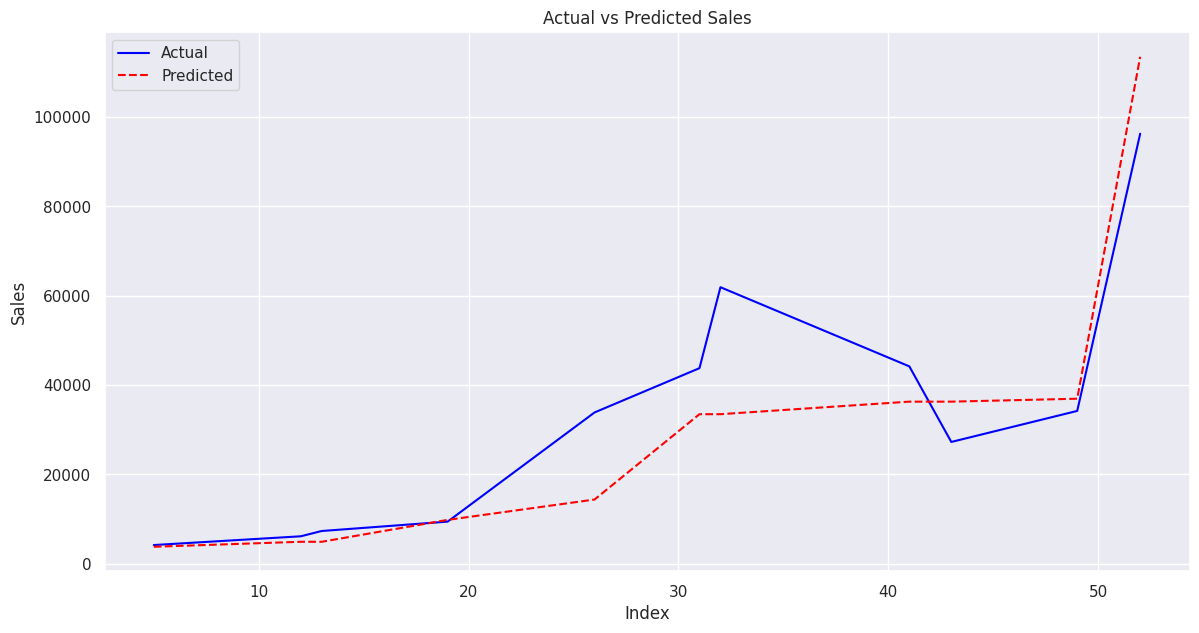

In [47]:
# Creating a DataFrame to align the predictions with the actual sales
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
comparison_df = comparison_df.sort_index()  # Sort by index to align the predictions correctly

plt.figure(figsize=(14, 7))

# Actual values in blue
plt.plot(comparison_df.index, comparison_df['Actual'], color="blue", label="Actual")

# Predicted values in red
plt.plot(comparison_df.index, comparison_df['Predicted'], color="red", label="Predicted", linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot visualizes the actual vs. predicted sales, with the actual sales depicted in blue and the predicted in red dashes. The degree of overlap between the two lines indicates the model's prediction accuracy, with a closer overlap representing higher accuracy.

The given code snippet below creates a visualization using seaborn, a Python data visualization library.

1. `regplot` is called to generate a scatter plot with a linear regression line.
2. Inputs for the plot are the flattened arrays of actual (`y_test`) and predicted (`predictions`) prices.
3. The regression line is set to appear in red.
4. Axis labels are added for clarity: "predicted price" on the x-axis and "true price" on the y-axis.

This visualization helps in assessing the accuracy of a regression model by comparing predicted values against actual values.

<Axes: xlabel='predicted price', ylabel='true price'>

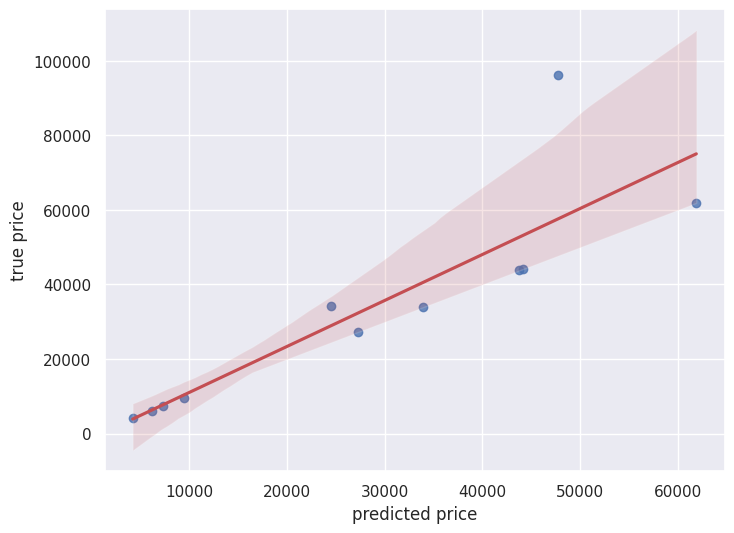

In [48]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted price")
plot.set_ylabel("true price")
plot

The regression plot shows the correlation between predicted and actual sales. The proximity of the data points to the red line, which represents the best fit, indicates prediction accuracy. Points closely clustered around the line suggest high accuracy, while points farther from the line signal larger prediction errors.

## Random Forest Regression

Random Forest Regression is employed for time series data to leverage its strength in capturing complex, non-linear interactions and dependencies. By aggregating multiple decision trees, this ensemble method enhances prediction accuracy and robustness, especially in forecasting scenarios. The inherent randomness also helps in mitigating overfitting, a common issue with time series. With these advantages, we will harness Random Forest Regression for predicting future sales.

The code snippet demonstrates the process of using a Random Forest Regressor for machine learning tasks in Python, utilizing the `sklearn` library.

1. A `RandomForestRegressor` is initialized with 100 trees and a set random state for reproducibility.
2. The model is trained using the `fit` method with `X_train` and `y_train` data.
3. Predictions are made on the test dataset `X_test`, resulting in `y_pred_rf`.
4. Performance metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the coefficient of determination (R²), are computed using the true values `y_test` and the predicted values `y_pred_rf`.
5. These error metrics are then organized into a dictionary named `error_metrics_rf` for easy reference.

The comments in the code provide a clear understanding of each step in the machine learning pipeline, from model initialization to performance evaluation. They are sufficiently informative for someone familiar with the `sklearn` library and machine learning concepts.


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# `random_state` is 42 becouse 42 is the Answer to the Ultimate Question of Life, the Universe, and Everything

# Train the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rf_cv_scores = cross_val_score(random_forest_regressor, X, y, cv=5)


# Assemble the error metrics
error_metrics_rf = {
    'Mean Absolute Error (MAE)': mae_rf,
    'Mean Squared Error (MSE)': mse_rf,
    'Root Mean Squared Error (RMSE)': rmse_rf,
    'R-squared (R²)': r2_rf
}

with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(random_forest_regressor, file) 


with open('../Application/models/random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(random_forest_regressor, file) 

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(random_forest_regressor, X_train, y_train, cv=tscv, scoring="r2")
print(scores.mean())

best_scores = cross_val_score(random_forest_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE with best estimator: {-best_scores.mean()}")

error_metrics_rf


-0.19336816949114632
Cross-validation MSE with best estimator: 544333950.487918


{'Mean Absolute Error (MAE)': 10771.291818181819,
 'Mean Squared Error (MSE)': 158556983.59815454,
 'Root Mean Squared Error (RMSE)': 12591.941216435,
 'R-squared (R²)': 0.7786152340694892}

The code snippet below performs the following operations:

1. Generates predictions for the test data using the trained Random Forest Regression model.
2. Constructs a DataFrame to compare the true values against the predicted values.
3. Calculates the prediction error as the absolute difference between true and predicted values, converting the error to an integer type.
4. Resets the index of the DataFrame for a clean presentation.

This organized structure allows for an easy assessment of the model's prediction accuracy on the test data.

In [50]:
predictions = random_forest_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"].astype(int))
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

,truth,prediction,error
0,43793.0,33757.89,10035
1,4197.0,6505.43,2308
2,61916.0,46233.78,15682
3,7341.0,23018.77,15677
4,9438.0,8749.28,688
5,34223.0,49487.39,15264
6,44196.0,52644.62,8448
7,33877.0,22556.72,11320
8,27274.0,51575.02,24301
9,6155.0,16173.19,10018


The given code block below imports necessary libraries and performs the following tasks:

1. Calculates the Maximum Error (Max Error) between the actual and predicted values, and then applies the ceiling function to round it up to the nearest integer. This metric provides insight into the worst-case error in the predictions.
2. Computes the Mean Squared Error (MSE) and then the Root Mean Squared Error (RMSE), also rounding it up to the nearest integer. The RMSE gives a sense of the magnitude of error across all predictions.

These metrics are printed out, giving a quick evaluation of the model's performance on the test data in terms of its prediction errors.

In [51]:
me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 24302
Root Mean Squared Error: 12592


The code snippet below is designed to visually compare the actual and predicted sales figures:

1. It initializes a DataFrame that juxtaposes the actual sales (`y_test`) with the predicted values (`y_pred_rf`).
2. The DataFrame is then sorted by its index to ensure the alignment of data points.
3. A matplotlib figure is created with a size of 14x7 inches for clear visualization.
4. The actual sales are plotted as a blue line, and the predicted sales are plotted as a dashed red line.
5. The plot is titled 'Actual vs Predicted Sales' and includes labels for both the x-axis (Index) and the y-axis (Sales).
6. A legend is added to differentiate between the actual and predicted lines.
7. The plot is displayed with `plt.show()`.

This visualization provides an intuitive comparison of the model's predictions against the actual sales data.

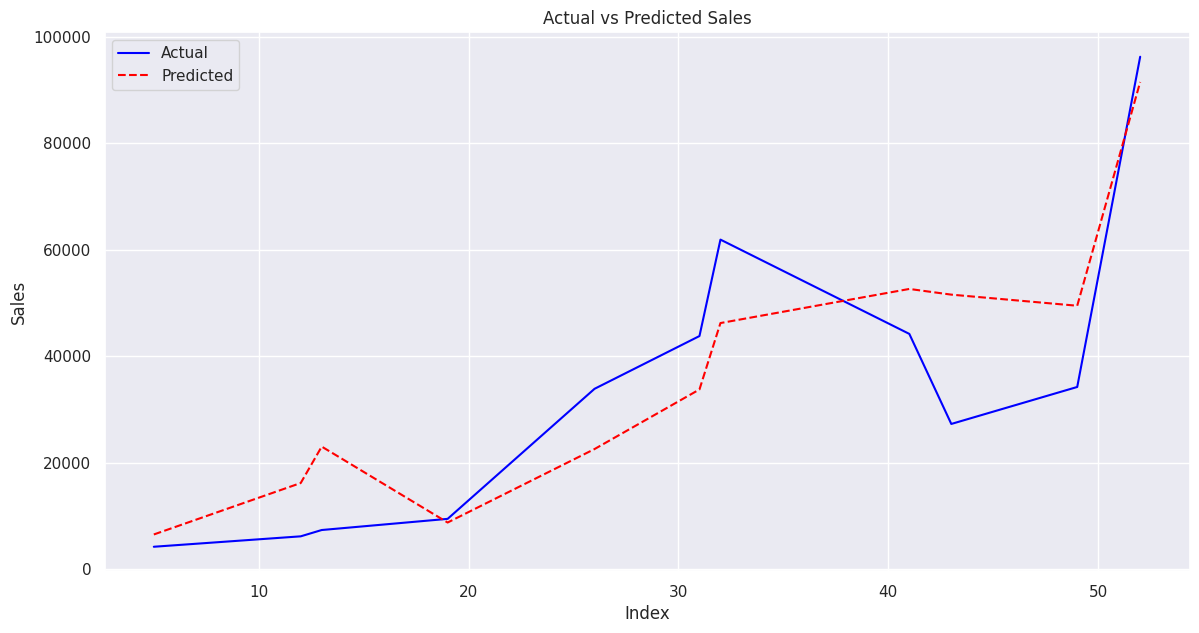

In [52]:
# Creating a DataFrame to align the predictions with the actual sales
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_df = comparison_df.sort_index()  # Sort by index to align the predictions correctly

plt.figure(figsize=(14, 7))

# Actual values in blue
plt.plot(comparison_df.index, comparison_df['Actual'], color="blue", label="Actual")

# Predicted values in red
plt.plot(comparison_df.index, comparison_df['Predicted'], color="red", label="Predicted", linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot visualizes the actual vs. predicted sales, with the actual sales depicted in blue and the predicted in red dashes. The degree of overlap between the two lines indicates the model's prediction accuracy, with a closer overlap representing higher accuracy.

The given code snippet below creates a visualization using seaborn, a Python data visualization library.

1. `regplot` is called to generate a scatter plot with a linear regression line.
2. Inputs for the plot are the flattened arrays of actual (`y_test`) and predicted (`predictions`) prices.
3. The regression line is set to appear in red.
4. Axis labels are added for clarity: "predicted price" on the x-axis and "true price" on the y-axis.

This visualization helps in assessing the accuracy of a regression model by comparing predicted values against actual values.

<Axes: xlabel='predicted price', ylabel='true price'>

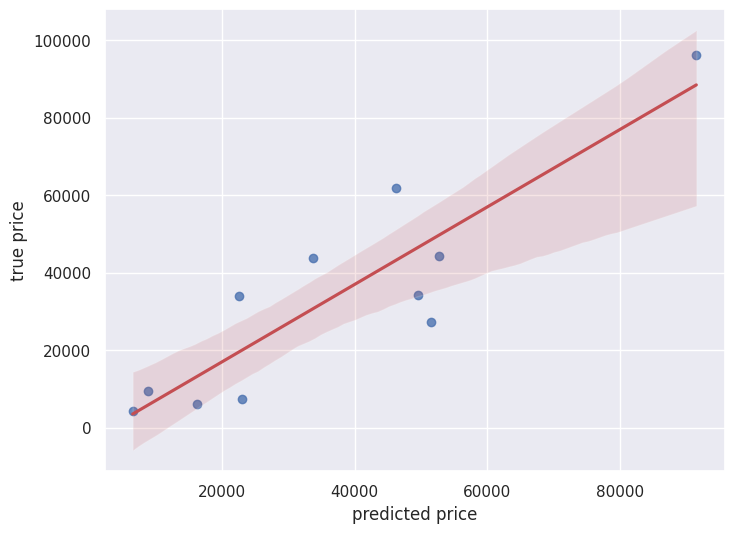

In [53]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted price")
plot.set_ylabel("true price")
plot

The regression plot shows the correlation between predicted and actual sales. The proximity of the data points to the red line, which represents the best fit, indicates prediction accuracy. Points closely clustered around the line suggest high accuracy, while points farther from the line signal larger prediction errors.

## Prophet

Facebook Prophet is a forecasting tool designed for handling the intricacies of time series data that traditional forecasting methods might struggle with. It is particularly adept at managing seasonal effects, missing data, and changes in trends by incorporating an additive model where non-linear trends fit with yearly, weekly, and daily seasonality, plus holiday effects. Prophet is robust to outliers and shifts in the trend, and it can automatically detect these changes with its change point detection capability. This flexibility makes it an excellent choice for businesses to forecast metrics like sales and web traffic where these conditions are common. With these features, Prophet stands out as a go-to model for generating reliable future forecasts in various applications.

The code snippet below demonstrates the initial data preparation required for time series forecasting with the Facebook Prophet model in Python.

1. The `Prophet` class is imported from the `prophet` library, which is designed for forecasting time series data.
2. A dataset named `DataSet.csv` is loaded into a pandas DataFrame `df` using the `read_csv` function.
3. The DataFrame columns are renamed to 'ds' for the date column and 'y' for the target variable, following the Prophet model's naming convention.
4. The 'ds' column is converted to datetime format using pandas' `to_datetime` function, ensuring that the Prophet model can correctly interpret the date information.

The comments within the code offer a clear explanation of each step necessary to prepare the data for forecasting, tailored for users with knowledge of Python's data handling libraries and the Prophet model.


In [54]:
from prophet import Prophet

df = pd.read_csv("DataSet.csv")

# Rename the columns to fit Prophet's requirements
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Convert the 'ds' column to datetime if it's not already
df['ds'] = pd.to_datetime(df['ds'])

The code snippet below demonstrates the process of splitting a dataset into training and testing sets for model training and evaluation, using Python's `sklearn` library.

1. The `train_test_split` function from the `sklearn.model_selection` module is used to divide the DataFrame `df` into two subsets.
2. The `test_size=0.2` parameter specifies that 20% of the data will be set aside for testing the model's performance.
3. The `shuffle=False` parameter ensures that the splitting preserves the order of the data, which is important for time series analysis where the sequence of data points is significant.

This step is crucial in the machine learning workflow as it prepares separate datasets for training and validating the model, enabling an assessment of the model's predictive capabilities on unseen data.


In [55]:
train, test = train_test_split(df, test_size=0.2, shuffle=False)

The code snippet below demonstrates the steps of initializing and configuring a Facebook Prophet model for time series forecasting with additional regressors in Python.

1. A new `Prophet` model instance is created and stored in the variable `model`.
2. Additional regressors 'Inflation', 'Unemployment', and 'Temperature' are added to the model using the `add_regressor` method. This allows the model to account for the potential impact of these external factors on the forecast.
3. The model is then trained on the `train` dataset using the `fit` method, which adjusts the model parameters to the historical data.

These steps prepare the Prophet model to make future predictions by incorporating not just the time series data but also external variables that could influence the trend and seasonality in the forecasted data.


In [56]:
# Initialize the Prophet model
model = Prophet()

# Before fitting the model, add the additional regressors
model.add_regressor("Inflation")
model.add_regressor("Unemployment")
model.add_regressor("Temperature")

# Fit the model with your dataframe
model.fit(train)

09:34:24 - cmdstanpy - INFO - Chain [1] start processing
09:34:24 - cmdstanpy - INFO - Chain [1] done processing


The code snippet below demonstrates how to prepare future data points for forecasting with the Facebook Prophet model that includes additional regressors.

1. The `make_future_dataframe` method from the Prophet model instance is used to create a new DataFrame `future` that extends into the future for a length equal to the size of the `test` dataset, with a daily frequency (`freq='D'`).
2. The `future` DataFrame is then augmented with the external regressors 'Inflation', 'Unemployment', and 'Temperature' by assigning the corresponding values from the original DataFrame `df`.

This process is essential for making forecasts with Prophet when the model has been extended to include additional regressors. It ensures that the future DataFrame not only contains the future dates for the forecast but also the values of the external factors that are expected to influence the forecast.


In [57]:
future = model.make_future_dataframe(periods=len(test), freq='D')
future['Inflation'] = df['Inflation']
future['Unemployment'] = df['Unemployment']
future['Temperature'] = df['Temperature']

The code snippet below demonstrates the forecasting and evaluation process using the Facebook Prophet model in Python.

1. The `prophet.diagnostics` module is imported to access functions for cross-validation and performance metrics, although they are not directly used in the snippet.
2. The `model.predict` method is called on the `future` DataFrame to generate forecasts, which are stored in the `forecast` DataFrame.
3. The predictions for the test set are extracted by taking the last `n` rows from the `forecast` DataFrame, where `n` is the length of the `test` set, focusing on the 'yhat' column that contains the predicted values.
4. Error metrics, specifically Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE), are calculated by comparing the test set's actual values with the predicted values.
5. The computed error metrics are then printed out to provide a quantitative evaluation of the model's performance.

This evaluation process is crucial for understanding the accuracy of the model's predictions and determining how well the model may perform on real-world data.


In [58]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Use the model to make predictions
forecast = model.predict(future)

# Evaluate predictions
# Extract the predicted values for the test set dates
predictions = forecast[-len(test):]['yhat']

# Calculate error metrics
mae = (test['y'] - predictions).abs().mean()
rmse = ((test['y'] - predictions) ** 2).mean() ** 0.5
mape = (test['y'] - predictions).abs() / test['y']

# Print error metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape.mean()}')

MAE: 37745.04655548285
RMSE: 48116.7737231036
MAPE: 0.4506227722856033


The code snippet below provides a visual comparison between actual and predicted sales using the matplotlib library in Python.

1. A new figure with a specified size is created for plotting.
2. The actual sales from the `test` dataset are plotted as a line chart, using the 'ds' column for the dates on the x-axis and the 'y' column for sales on the y-axis, labeled as 'Actual Sales'.
3. The predicted sales, stored in the `predictions` variable, are plotted on the same graph for direct comparison, labeled as 'Predicted Sales'.
4. Both the x-axis and y-axis are labeled as 'Date' and 'Sales', respectively, and a title 'Actual vs Predicted Sales' is added to the chart.
5. A legend is included to help distinguish between the actual and predicted sales lines.
6. Finally, the `plt.show()` function is called to display the resulting plot.

This visualization step is an integral part of the analysis, providing a clear and intuitive way to assess the model's performance by comparing its predictions against the actual sales data.


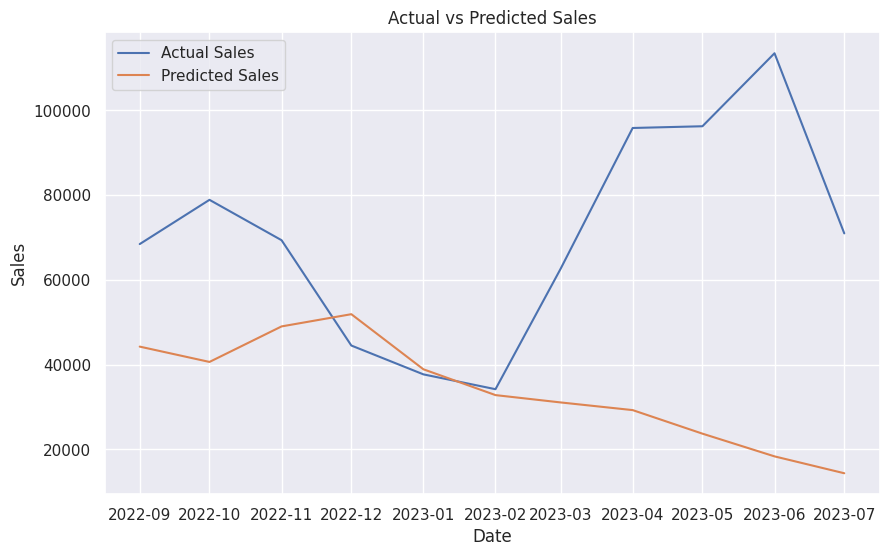

In [59]:
# Plot actual sales
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales')

# Plot predicted sales
plt.plot(test['ds'], predictions, label='Predicted Sales')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Display the plot
plt.show()

## Conclusions

From this project, I've realized several key takeaways. One is that I wouldn't undertake a similar challenge again, particularly due to the nature of the data. The data lacked seasonality and had many oversimplified attributes, making it difficult to work with. Additionally, selecting features that influence sales was not an easy task. In the future, I would prefer to engage in a classification problem or visual recognition rather than forecasting time series variables.

### Models 

Among various models tested, traditional regressors like Linear Regression, Decision Tree Regressor, and Random Forest Regressor showed the best performance. Attempts to use SVM, specifically SVR for prediction, resulted in poor accuracy. Prophet, another model tested, also yielded unsatisfactory results. This was primarily due to the absence of seasonality in the data, which is a crucial factor for Prophet's effectiveness, especially considering its design for time series data. The classic models, namely Linear Regression, Decision Tree Regressor, and Random Forest Regressor, performed best in this scenario. This superior performance could be attributed to the unique nature of the data, particularly considering the period of its collection, which was marked by a pandemic, economic crisis, and political shifts, complicating prediction efforts. However, it's worth noting that cross-validation showed disappointing results for these traditional models, with a negative value, despite being correctly implemented and maintaining the correct chronological order of the data. Out of all the models, Linear Regression stood out for its simplicity and effectiveness.

